            '2000100012001
Date                      
2016-04-01         61200.0
2016-05-01        148500.0
2016-06-01        103500.0
2016-07-01        107100.0
2016-08-01        155700.0


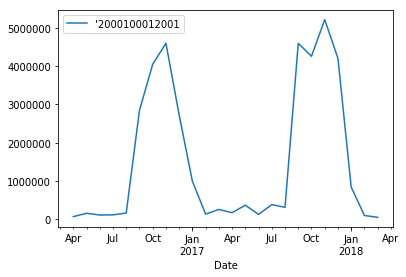

In [2]:
import matplotlib.pyplot as plt
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
def parser(x):
    return datetime.strptime(x , '%d/%m/%Y')

series= read_csv('sku 1 DP26.csv', parse_dates=['Date'] , index_col='Date', date_parser=parser)
print(series.head())
series.plot()
pyplot.show()

In [3]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return (((np.sum(np.abs(y_true - y_pred))) / (np.sum(y_pred))) * 100)

In [6]:
def movingavg(series,l,u):
    min = 999999999999999
    for w in range (l,u+1):
        result=[]
        for j in range(w):
            result.append(series[j])
        for i in range (w,len(series)):
            result.append((sum(series[i-w:i]))/w)
        mape=mean_absolute_percentage_error(series,result)
        #print result
        if (0<=mape<min):
            min=mape
            minW=w
            minr=result
        print ('Window-size {} - mape {}'.format(w,mape))
    absolute_error=(min/100)*sum(minr)
    forecast_sum=sum(minr)
    print ('Min mape is {} - window size {} - absolute error {} - forecast sum {}'.format(mape,minW,absolute_error,forecast_sum))
    return minr

In [7]:
series['simple moving']=movingavg(series["'2000100012001"],2,12)

Window-size 2 - mape 74.49209972301654
Window-size 3 - mape 94.62308969743259
Window-size 4 - mape 107.46087665510346
Window-size 5 - mape 120.51831179706612
Window-size 6 - mape 112.81880337905386
Window-size 7 - mape 98.34265440006938
Window-size 8 - mape 83.2377538048478
Window-size 9 - mape 77.26853499792978
Window-size 10 - mape 74.33707364915901
Window-size 11 - mape 69.16544507612099
Window-size 12 - mape 63.662209987367035
Min mape is 63.662209987367035 - window size 12 - absolute error 21881369.02000001 - forecast sum 34371048.42000002


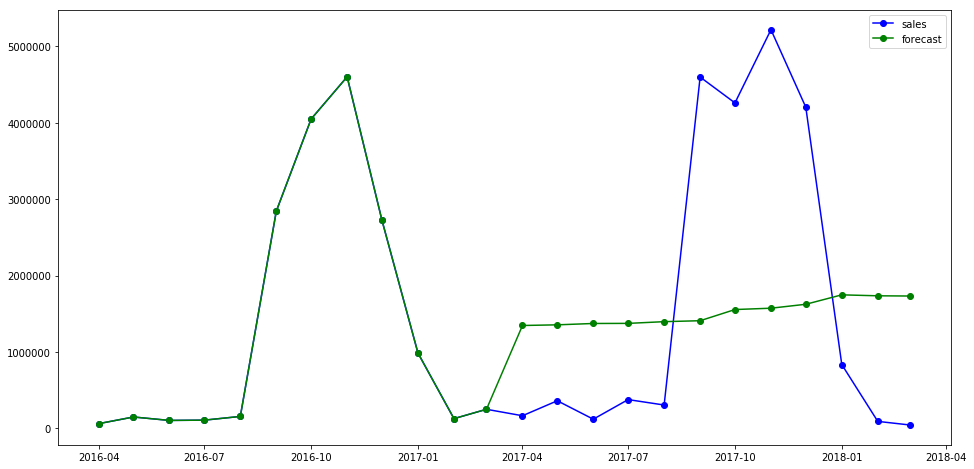

In [8]:
plt.figure(figsize=(16,8))
plt.plot(series["'2000100012001"], c="blue", marker="o", label='sales' )
plt.plot(series['simple moving'], "g-o", label='forecast')
plt.legend(loc='best')
plt.style.use("ggplot")
plt.show()

In [9]:
series["simple moving"]

Date
2016-04-01      61200.00
2016-05-01     148500.00
2016-06-01     103500.00
2016-07-01     107100.00
2016-08-01     155700.00
2016-09-01    2843100.00
2016-10-01    4049100.00
2016-11-01    4601264.04
2016-12-01    2722500.00
2017-01-01     985500.00
2017-02-01     126900.00
2017-03-01     249300.00
2017-04-01    1346138.67
2017-05-01    1354763.67
2017-06-01    1372463.67
2017-07-01    1373813.67
2017-08-01    1396238.67
2017-09-01    1408688.67
2017-10-01    1554938.67
2017-11-01    1572488.67
2017-12-01    1623891.67
2018-01-01    1747341.67
2018-02-01    1734808.34
2018-03-01    1731808.34
Name: simple moving, dtype: float64

In [10]:
def double_exponential_smoothing(series, alphaL, alphaU, betaL, betaU):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    betal=int(10*betaL)
    betau=int(10*betaU)
    min = 999999999999999
    
    for alpha in range (alphal, alphau+1):
        result=[]
        for beta in range (betal, betau+1):
            result = [series[0], series[0]]
            for n in range(2, len(series)):
                if n == 2:
                    level, trend = series[0], series[1] - series[0]
                if n <= len(series): # we are forecasting
                    value = series[n-1]
                last_level, level = level, (alpha/10.0)*value + (1-(alpha/10.0))*(level+trend)
                trend = (beta/10.0)*(level-last_level) + (1-(beta/10.0))*trend
                result.append(level+trend)
            mape=mean_absolute_percentage_error(series,result)
            #print result
            if (0<=mape<min):
                min=mape
                minalpha=(alpha/10.0)
                minbeta=(beta/10.0)
                minr=result
            print ('alpha {} - beta {} - mape {}'.format((alpha/10.0),(beta/10.0),mape))
    absolute_error=(min/100)*sum(minr)
    forecast_sum=sum(minr)
    print ('min alpha {} - min beta {} - mape {} - absolute error {} - forecast sum {}'.format(minalpha,minbeta,min,absolute_error,forecast_sum))
    return minr

In [11]:
double_expo = double_exponential_smoothing(series["'2000100012001"], 0.1, 0.9,0.1,0.9)
series['double expo']=double_expo

alpha 0.1 - beta 0.1 - mape 106.69485431256258
alpha 0.1 - beta 0.2 - mape 106.09305240395341
alpha 0.1 - beta 0.3 - mape 108.52282328834377
alpha 0.1 - beta 0.4 - mape 113.01354781575515
alpha 0.1 - beta 0.5 - mape 118.92754948184722
alpha 0.1 - beta 0.6 - mape 125.6991786518238
alpha 0.1 - beta 0.7 - mape 132.74125949432838
alpha 0.1 - beta 0.8 - mape 139.437365455838
alpha 0.1 - beta 0.9 - mape 147.15463533523433
alpha 0.2 - beta 0.1 - mape 101.94933194235816
alpha 0.2 - beta 0.2 - mape 106.44453719063247
alpha 0.2 - beta 0.3 - mape 112.64711545023607
alpha 0.2 - beta 0.4 - mape 119.63822255187495
alpha 0.2 - beta 0.5 - mape 126.83756117528549
alpha 0.2 - beta 0.6 - mape 130.39213940047293
alpha 0.2 - beta 0.7 - mape 131.9599090545892
alpha 0.2 - beta 0.8 - mape 133.04990117366958
alpha 0.2 - beta 0.9 - mape 134.14762413422594
alpha 0.3 - beta 0.1 - mape 95.35369300893028
alpha 0.3 - beta 0.2 - mape 99.42010185218109
alpha 0.3 - beta 0.3 - mape 104.67540561043887
alpha 0.3 - beta 0.

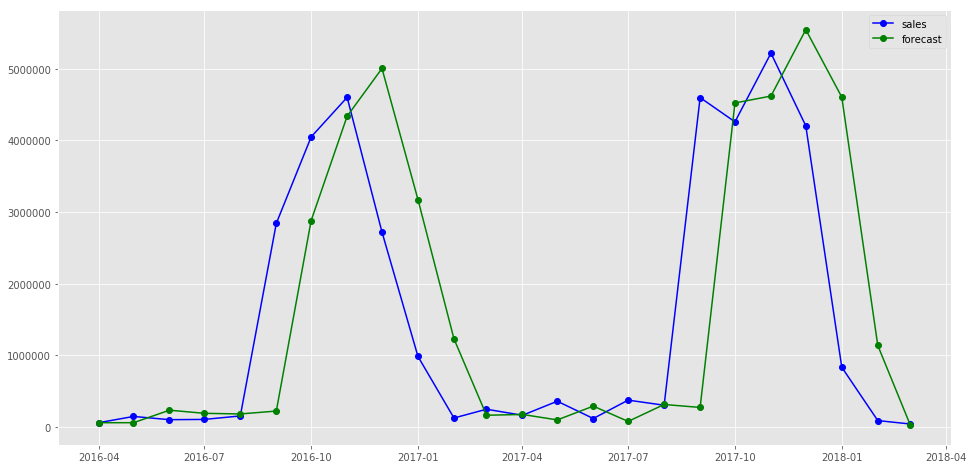

In [12]:
plt.figure(figsize=(16,8))
plt.plot(series["'2000100012001"], c="blue", marker="o", label='sales' )
plt.plot(series['double expo'], "g-o", label='forecast')
plt.legend(loc='best')
plt.style.use("ggplot")
plt.show()

In [13]:
def exponential_smoothing(series, alphaL,alphaU):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    min = 999999999999999
    
    for alpha in range (alphal, alphau+1):
        result=[]
        result = [series[0]] # first value is same as series
        for n in range(1, (len(series))):
            result.append((alpha/10.0) * series[n-1] + (1 - (alpha/10.0)) * result[n-1])
        mape=mean_absolute_percentage_error(series,result)
        #print result
        if (0<=mape<min):
            min=mape
            minalpha=(alpha/10.0)
            minr=result
        print ('alpha {} - mape {}'.format((alpha/10.0),mape))
    absolute_error=(min/100)*sum(minr)
    forecast_sum=sum(minr[24:])
    print ('best alpha {} - mape is {} - absolute error {} - forecast sum {}'.format(minalpha,min,absolute_error,forecast_sum))
    return minr

In [14]:
simple_expo=exponential_smoothing(series["'2000100012001"], 0.1,0.9)
series['simple expo']=simple_expo

alpha 0.1 - mape 164.69358341964423
alpha 0.2 - mape 125.29573524835675
alpha 0.3 - mape 105.23711178437311
alpha 0.4 - mape 92.6551294864918
alpha 0.5 - mape 82.85952969120646
alpha 0.6 - mape 75.96100413431466
alpha 0.7 - mape 69.66983601352898
alpha 0.8 - mape 63.85050066721787
alpha 0.9 - mape 58.75007540671091
best alpha 0.9 - mape is 58.75007540671091 - absolute error 21579989.679069016 - forecast sum 0


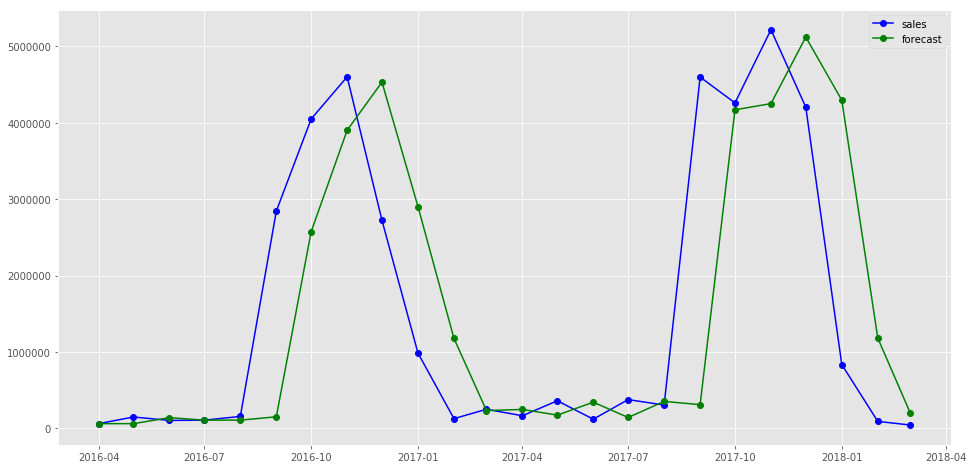

In [15]:
plt.figure(figsize=(16,8))
plt.plot(series["'2000100012001"], c="blue", marker="o", label='sales' )
plt.plot(series['simple expo'], "g-o", label='forecast')
plt.legend(loc='best')
plt.style.use("ggplot")
plt.show()

In [16]:
def M_initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen
def M_initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
def M_triple_exponential_smoothing(series, slenL, slenU, alphaL, alphaU, betaL, betaU, gammaL, gammaU, n_preds):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    betal=int(10*betaL)
    betau=int(10*betaU)
    gammal=int(10*gammaL)
    gammau=int(10*gammaU)
    min = 999999999999999
    min2=999999999999999
    for slen in range (slenL, slenU+1):
        try:
            for alpha in range (alphal, alphau+1):
                for beta in range (betal, betau+1):
                    for gamma in range (gammal, gammau+1):
                        result=[]
                        seasonals = M_initial_seasonal_components(series, slen)
                        for i in range(len(series)+n_preds):
                            if i == 0: # initial values
                                smooth = series[0]
                                trend = M_initial_trend(series, slen)
                                result.append(series[0])
                                continue
                            if i >= len(series): # we are forecasting
                                m = i - len(series) + 1
                                result.append((smooth + m*trend) * seasonals[i%slen])
                            else:
                                val = series[i-1]
                                last_smooth, smooth = smooth, (alpha/10.0)*(val/seasonals[i%slen]) + (1-(alpha/10.0))*(smooth+trend)
                                trend = (beta/10.0) * (smooth-last_smooth) + (1-(beta/10.0))*trend
                                seasonals[i%slen] = (gamma/10.0)*(val/smooth) + (1-(gamma/10.0))*seasonals[i%slen]
                                result.append((smooth+trend)*seasonals[i%slen])
                        mape=mean_absolute_percentage_error(series,result)
                        #print result
                        if (0<=mape<min):
                            min=mape
                            minalpha=(alpha/10.0)
                            minbeta=(beta/10.0)
                            mingamma=(gamma/10.0)
                            minr=result
                        print ('alpha {} - beta {} - gamma {} - mape {}'.format((alpha/10.0),(beta/10.0),(gamma/10.0),mape))
            print('best alpha {} - best beta {} - best gamma {} - mape {} - slen {}'.format(minalpha,minbeta,mingamma,min,slen))
        except:
            continue
        if (0<=min<min2):
            min2=min
            bestalpha=minalpha
            bestbeta=minbeta
            bestgamma=mingamma
            bestslen=slen
            bestr=minr
    absolute_error=(min2/100)*sum(bestr)
    forecast_sum=sum(bestr)
    print ('A {} - B {} - G {} - M {} - S {} - AE {} - FS {}'.format(bestalpha,bestbeta,bestgamma,min2,bestslen,absolute_error,forecast_sum))
    return bestr

In [18]:
M_triple_expo =  M_triple_exponential_smoothing(series["'2000100012001"],2, 12, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0)
series['M_triple expo'] = M_triple_expo


alpha 0.1 - beta 0.1 - gamma 0.1 - mape 1394.1082601165576
alpha 0.1 - beta 0.1 - gamma 0.2 - mape 1225.6546131142927
alpha 0.1 - beta 0.1 - gamma 0.3 - mape 1221.7190534178578
alpha 0.1 - beta 0.1 - gamma 0.4 - mape 1270.4595136657397
alpha 0.1 - beta 0.1 - gamma 0.5 - mape 1319.1775776544114
alpha 0.1 - beta 0.1 - gamma 0.6 - mape 1382.5108910413974
alpha 0.1 - beta 0.1 - gamma 0.7 - mape 1379.9387554386278
alpha 0.1 - beta 0.1 - gamma 0.8 - mape 1380.4311599204486
alpha 0.1 - beta 0.1 - gamma 0.9 - mape 2983.8486352251625
alpha 0.1 - beta 0.2 - gamma 0.1 - mape 1306.2702611007708
alpha 0.1 - beta 0.2 - gamma 0.2 - mape 1024.2378460363987
alpha 0.1 - beta 0.2 - gamma 0.3 - mape 960.8829328782165
alpha 0.1 - beta 0.2 - gamma 0.4 - mape 980.367867927776
alpha 0.1 - beta 0.2 - gamma 0.5 - mape 1032.269427770092
alpha 0.1 - beta 0.2 - gamma 0.6 - mape 1088.1492958567587
alpha 0.1 - beta 0.2 - gamma 0.7 - mape 1117.3915720526256
alpha 0.1 - beta 0.2 - gamma 0.8 - mape 1129.1223068979707
a

alpha 0.2 - beta 0.9 - gamma 0.1 - mape 824.3620382727096
alpha 0.2 - beta 0.9 - gamma 0.2 - mape 584.2834164581809
alpha 0.2 - beta 0.9 - gamma 0.3 - mape 441.6711193865023
alpha 0.2 - beta 0.9 - gamma 0.4 - mape 352.9475177112428
alpha 0.2 - beta 0.9 - gamma 0.5 - mape 294.6549340885258
alpha 0.2 - beta 0.9 - gamma 0.6 - mape 255.83860489503078
alpha 0.2 - beta 0.9 - gamma 0.7 - mape 228.0582901862063
alpha 0.2 - beta 0.9 - gamma 0.8 - mape 211.60850814118092
alpha 0.2 - beta 0.9 - gamma 0.9 - mape 194.4115917646132
alpha 0.3 - beta 0.1 - gamma 0.1 - mape 683.6347306987033
alpha 0.3 - beta 0.1 - gamma 0.2 - mape 592.667418301734
alpha 0.3 - beta 0.1 - gamma 0.3 - mape 578.857290338775
alpha 0.3 - beta 0.1 - gamma 0.4 - mape 719.7512697180509
alpha 0.3 - beta 0.1 - gamma 0.5 - mape 2428.926532010838
alpha 0.3 - beta 0.1 - gamma 0.6 - mape -183.66233481373672
alpha 0.3 - beta 0.1 - gamma 0.7 - mape 264.89106772047745
alpha 0.3 - beta 0.1 - gamma 0.8 - mape 328.26519900061913
alpha 0.3 

alpha 0.4 - beta 0.7 - gamma 0.7 - mape 165.80919995937654
alpha 0.4 - beta 0.7 - gamma 0.8 - mape 140.5304285740845
alpha 0.4 - beta 0.7 - gamma 0.9 - mape 112.51837835641851
alpha 0.4 - beta 0.8 - gamma 0.1 - mape 598.3268557586186
alpha 0.4 - beta 0.8 - gamma 0.2 - mape 463.510996729669
alpha 0.4 - beta 0.8 - gamma 0.3 - mape 366.3933830355349
alpha 0.4 - beta 0.8 - gamma 0.4 - mape 295.75984812271713
alpha 0.4 - beta 0.8 - gamma 0.5 - mape 239.38972758677295
alpha 0.4 - beta 0.8 - gamma 0.6 - mape 197.47588390783147
alpha 0.4 - beta 0.8 - gamma 0.7 - mape 164.28595390130423
alpha 0.4 - beta 0.8 - gamma 0.8 - mape 139.45581756510373
alpha 0.4 - beta 0.8 - gamma 0.9 - mape 116.1572659483055
alpha 0.4 - beta 0.9 - gamma 0.1 - mape 623.1803039926721
alpha 0.4 - beta 0.9 - gamma 0.2 - mape 481.806719131394
alpha 0.4 - beta 0.9 - gamma 0.3 - mape 378.98601819206624
alpha 0.4 - beta 0.9 - gamma 0.4 - mape 305.68811278627214
alpha 0.4 - beta 0.9 - gamma 0.5 - mape 245.45518013988473
alpha 

alpha 0.7 - beta 0.2 - gamma 0.1 - mape 488.79661517851855
alpha 0.7 - beta 0.2 - gamma 0.2 - mape 350.8110754694773
alpha 0.7 - beta 0.2 - gamma 0.3 - mape 298.3597669535334
alpha 0.7 - beta 0.2 - gamma 0.4 - mape 230.71814272237992
alpha 0.7 - beta 0.2 - gamma 0.5 - mape 196.57013371464998
alpha 0.7 - beta 0.2 - gamma 0.6 - mape 168.56236228716725
alpha 0.7 - beta 0.2 - gamma 0.7 - mape 143.77634741799085
alpha 0.7 - beta 0.2 - gamma 0.8 - mape 119.06116197634162
alpha 0.7 - beta 0.2 - gamma 0.9 - mape 111.11539383314893
alpha 0.7 - beta 0.3 - gamma 0.1 - mape 528.6484713124985
alpha 0.7 - beta 0.3 - gamma 0.2 - mape 415.7238138273592
alpha 0.7 - beta 0.3 - gamma 0.3 - mape 333.41983288449825
alpha 0.7 - beta 0.3 - gamma 0.4 - mape 271.68107102202106
alpha 0.7 - beta 0.3 - gamma 0.5 - mape 226.4291849457225
alpha 0.7 - beta 0.3 - gamma 0.6 - mape 187.29202447716628
alpha 0.7 - beta 0.3 - gamma 0.7 - mape 157.2614151486198
alpha 0.7 - beta 0.3 - gamma 0.8 - mape 147.5866467318862
alph

alpha 0.9 - beta 0.9 - gamma 0.2 - mape -250.4535635560507
alpha 0.9 - beta 0.9 - gamma 0.3 - mape -257.68599580783155
alpha 0.9 - beta 0.9 - gamma 0.4 - mape -249.29995900577842
alpha 0.9 - beta 0.9 - gamma 0.5 - mape -255.20489782923642
alpha 0.9 - beta 0.9 - gamma 0.6 - mape -272.5576820523135
alpha 0.9 - beta 0.9 - gamma 0.7 - mape -276.90495248133544
alpha 0.9 - beta 0.9 - gamma 0.8 - mape -302.9393017307367
alpha 0.9 - beta 0.9 - gamma 0.9 - mape -343.6232996981146
best alpha 0.9 - best beta 0.1 - best gamma 0.9 - mape 95.37272568405648 - slen 2
alpha 0.1 - beta 0.1 - gamma 0.1 - mape 6361.361068741784
alpha 0.1 - beta 0.1 - gamma 0.2 - mape 9666.244893811112
alpha 0.1 - beta 0.1 - gamma 0.3 - mape 15428.413501919289
alpha 0.1 - beta 0.1 - gamma 0.4 - mape 24832.686958123148
alpha 0.1 - beta 0.1 - gamma 0.5 - mape 37279.80325442277
alpha 0.1 - beta 0.1 - gamma 0.6 - mape 48601.19519348431
alpha 0.1 - beta 0.1 - gamma 0.7 - mape 55267.59876005541
alpha 0.1 - beta 0.1 - gamma 0.8 -

alpha 0.2 - beta 0.9 - gamma 0.7 - mape 2147.498711774818
alpha 0.2 - beta 0.9 - gamma 0.8 - mape 1989.531980284507
alpha 0.2 - beta 0.9 - gamma 0.9 - mape 1844.6545458794428
alpha 0.3 - beta 0.1 - gamma 0.1 - mape 9490.305326965272
alpha 0.3 - beta 0.1 - gamma 0.2 - mape 9976.644476579722
alpha 0.3 - beta 0.1 - gamma 0.3 - mape 9867.13961701654
alpha 0.3 - beta 0.1 - gamma 0.4 - mape 9354.287659417441
alpha 0.3 - beta 0.1 - gamma 0.5 - mape 8676.93097115066
alpha 0.3 - beta 0.1 - gamma 0.6 - mape 7990.469312858042
alpha 0.3 - beta 0.1 - gamma 0.7 - mape 7357.694500918933
alpha 0.3 - beta 0.1 - gamma 0.8 - mape 6772.548573211148
alpha 0.3 - beta 0.1 - gamma 0.9 - mape 6164.8930158707
alpha 0.3 - beta 0.2 - gamma 0.1 - mape 9324.541876972968
alpha 0.3 - beta 0.2 - gamma 0.2 - mape 7656.800562003092
alpha 0.3 - beta 0.2 - gamma 0.3 - mape 6706.757090743579
alpha 0.3 - beta 0.2 - gamma 0.4 - mape 6082.803651097861
alpha 0.3 - beta 0.2 - gamma 0.5 - mape 5624.586782843554
alpha 0.3 - beta 

alpha 0.5 - beta 0.3 - gamma 0.1 - mape 6264.77510246827
alpha 0.5 - beta 0.3 - gamma 0.2 - mape 5557.943670529602
alpha 0.5 - beta 0.3 - gamma 0.3 - mape 5015.018936283528
alpha 0.5 - beta 0.3 - gamma 0.4 - mape 4556.70547637549
alpha 0.5 - beta 0.3 - gamma 0.5 - mape 4179.610685996357
alpha 0.5 - beta 0.3 - gamma 0.6 - mape 3864.9579138345175
alpha 0.5 - beta 0.3 - gamma 0.7 - mape 3590.3552521294914
alpha 0.5 - beta 0.3 - gamma 0.8 - mape 3737.3820069521194
alpha 0.5 - beta 0.3 - gamma 0.9 - mape 3041.8135233100115
alpha 0.5 - beta 0.4 - gamma 0.1 - mape 6263.282385772934
alpha 0.5 - beta 0.4 - gamma 0.2 - mape 5392.373327934546
alpha 0.5 - beta 0.4 - gamma 0.3 - mape 4722.76733871925
alpha 0.5 - beta 0.4 - gamma 0.4 - mape 4196.177854427957
alpha 0.5 - beta 0.4 - gamma 0.5 - mape 3770.719161185708
alpha 0.5 - beta 0.4 - gamma 0.6 - mape 3429.3984908090893
alpha 0.5 - beta 0.4 - gamma 0.7 - mape 3170.13148333456
alpha 0.5 - beta 0.4 - gamma 0.8 - mape 2896.9442364426477
alpha 0.5 - 

alpha 0.7 - beta 0.3 - gamma 0.7 - mape 18008.069441715255
alpha 0.7 - beta 0.3 - gamma 0.8 - mape 12880.012214671151
alpha 0.7 - beta 0.3 - gamma 0.9 - mape 9396.55808829248
alpha 0.7 - beta 0.4 - gamma 0.1 - mape -5900.274873829675
alpha 0.7 - beta 0.4 - gamma 0.2 - mape -6179.764438766409
alpha 0.7 - beta 0.4 - gamma 0.3 - mape -6498.17021703769
alpha 0.7 - beta 0.4 - gamma 0.4 - mape -6840.840532412552
alpha 0.7 - beta 0.4 - gamma 0.5 - mape -7191.644977770688
alpha 0.7 - beta 0.4 - gamma 0.6 - mape -7689.122225729709
alpha 0.7 - beta 0.4 - gamma 0.7 - mape -8682.478020483744
alpha 0.7 - beta 0.4 - gamma 0.8 - mape -11730.747457141664
alpha 0.7 - beta 0.4 - gamma 0.9 - mape -18385.213443729284
alpha 0.7 - beta 0.5 - gamma 0.1 - mape -2505.2805599400053
alpha 0.7 - beta 0.5 - gamma 0.2 - mape -2610.1766829227013
alpha 0.7 - beta 0.5 - gamma 0.3 - mape -2760.893313623853
alpha 0.7 - beta 0.5 - gamma 0.4 - mape -2880.8819916517887
alpha 0.7 - beta 0.5 - gamma 0.5 - mape -3061.47594929

alpha 0.9 - beta 0.6 - gamma 0.2 - mape -408.4978173732787
alpha 0.9 - beta 0.6 - gamma 0.3 - mape -406.61542874311965
alpha 0.9 - beta 0.6 - gamma 0.4 - mape -409.41209053776674
alpha 0.9 - beta 0.6 - gamma 0.5 - mape -411.399982771817
alpha 0.9 - beta 0.6 - gamma 0.6 - mape -414.00006871160394
alpha 0.9 - beta 0.6 - gamma 0.7 - mape -416.17025090242305
alpha 0.9 - beta 0.6 - gamma 0.8 - mape -444.82771284266676
alpha 0.9 - beta 0.6 - gamma 0.9 - mape -449.6878247037862
alpha 0.9 - beta 0.7 - gamma 0.1 - mape -215.91869026597922
alpha 0.9 - beta 0.7 - gamma 0.2 - mape -214.96708931077188
alpha 0.9 - beta 0.7 - gamma 0.3 - mape -214.34386856218742
alpha 0.9 - beta 0.7 - gamma 0.4 - mape -213.25459757908024
alpha 0.9 - beta 0.7 - gamma 0.5 - mape -213.99023756421118
alpha 0.9 - beta 0.7 - gamma 0.6 - mape -214.0188915083054
alpha 0.9 - beta 0.7 - gamma 0.7 - mape -210.3820347426588
alpha 0.9 - beta 0.7 - gamma 0.8 - mape -210.89661849264343
alpha 0.9 - beta 0.7 - gamma 0.9 - mape -218.0

alpha 0.3 - beta 0.1 - gamma 0.8 - mape -3573.8626322107443
alpha 0.3 - beta 0.1 - gamma 0.9 - mape -2829.555676088219
alpha 0.3 - beta 0.2 - gamma 0.1 - mape 1938.7374794496893
alpha 0.3 - beta 0.2 - gamma 0.2 - mape 2149.479847361833
alpha 0.3 - beta 0.2 - gamma 0.3 - mape 2475.5970678277304
alpha 0.3 - beta 0.2 - gamma 0.4 - mape 2989.519659852493
alpha 0.3 - beta 0.2 - gamma 0.5 - mape 3857.2112378533793
alpha 0.3 - beta 0.2 - gamma 0.6 - mape 5548.722264495789
alpha 0.3 - beta 0.2 - gamma 0.7 - mape 10096.787628027767
alpha 0.3 - beta 0.2 - gamma 0.8 - mape 58651.264094933125
alpha 0.3 - beta 0.2 - gamma 0.9 - mape -15589.766853073
alpha 0.3 - beta 0.3 - gamma 0.1 - mape 1266.3776495419268
alpha 0.3 - beta 0.3 - gamma 0.2 - mape 1322.9605249041952
alpha 0.3 - beta 0.3 - gamma 0.3 - mape 1408.6468026981756
alpha 0.3 - beta 0.3 - gamma 0.4 - mape 1532.0910472890953
alpha 0.3 - beta 0.3 - gamma 0.5 - mape 1707.5143534153192
alpha 0.3 - beta 0.3 - gamma 0.6 - mape 1959.3849341097346
a

alpha 0.6 - beta 0.5 - gamma 0.4 - mape 290.3539335781238
alpha 0.6 - beta 0.5 - gamma 0.5 - mape 286.1150237427345
alpha 0.6 - beta 0.5 - gamma 0.6 - mape 282.07874000160496
alpha 0.6 - beta 0.5 - gamma 0.7 - mape 278.180784023067
alpha 0.6 - beta 0.5 - gamma 0.8 - mape 274.0564201642651
alpha 0.6 - beta 0.5 - gamma 0.9 - mape 270.00111866091777
alpha 0.6 - beta 0.6 - gamma 0.1 - mape 241.92276974999788
alpha 0.6 - beta 0.6 - gamma 0.2 - mape 234.7564623563259
alpha 0.6 - beta 0.6 - gamma 0.3 - mape 227.85909156025426
alpha 0.6 - beta 0.6 - gamma 0.4 - mape 221.21858411135125
alpha 0.6 - beta 0.6 - gamma 0.5 - mape 214.825304506252
alpha 0.6 - beta 0.6 - gamma 0.6 - mape 209.03590527964417
alpha 0.6 - beta 0.6 - gamma 0.7 - mape 202.72714821190522
alpha 0.6 - beta 0.6 - gamma 0.8 - mape 196.96909285913065
alpha 0.6 - beta 0.6 - gamma 0.9 - mape 191.10269780676356
alpha 0.6 - beta 0.7 - gamma 0.1 - mape 223.86338552129055
alpha 0.6 - beta 0.7 - gamma 0.2 - mape 216.6712323169711
alpha 

alpha 0.1 - beta 0.3 - gamma 0.3 - mape 10484.607883319968
alpha 0.1 - beta 0.3 - gamma 0.4 - mape 19994.699461946017
alpha 0.1 - beta 0.3 - gamma 0.5 - mape -51157.19715895948
alpha 0.1 - beta 0.3 - gamma 0.6 - mape -9069.394845662753
alpha 0.1 - beta 0.3 - gamma 0.7 - mape -4581.019516946764
alpha 0.1 - beta 0.3 - gamma 0.8 - mape -2945.859243688822
alpha 0.1 - beta 0.3 - gamma 0.9 - mape -2129.0546473196723
alpha 0.1 - beta 0.4 - gamma 0.1 - mape 5628.617152399155
alpha 0.1 - beta 0.4 - gamma 0.2 - mape 4498.286731482677
alpha 0.1 - beta 0.4 - gamma 0.3 - mape 4285.999040463496
alpha 0.1 - beta 0.4 - gamma 0.4 - mape 4758.761287021764
alpha 0.1 - beta 0.4 - gamma 0.5 - mape 6467.262548984127
alpha 0.1 - beta 0.4 - gamma 0.6 - mape 14109.946818576907
alpha 0.1 - beta 0.4 - gamma 0.7 - mape -28245.89283384921
alpha 0.1 - beta 0.4 - gamma 0.8 - mape -6335.928489668882
alpha 0.1 - beta 0.4 - gamma 0.9 - mape -3443.3131977576672
alpha 0.1 - beta 0.5 - gamma 0.1 - mape 3129.1291959543582


alpha 0.3 - beta 0.2 - gamma 0.5 - mape 1319.3368766172734
alpha 0.3 - beta 0.2 - gamma 0.6 - mape 1379.3385683193599
alpha 0.3 - beta 0.2 - gamma 0.7 - mape 1454.662145050578
alpha 0.3 - beta 0.2 - gamma 0.8 - mape 1547.0151054323892
alpha 0.3 - beta 0.2 - gamma 0.9 - mape 1657.5388410389812
alpha 0.3 - beta 0.3 - gamma 0.1 - mape 851.151815152522
alpha 0.3 - beta 0.3 - gamma 0.2 - mape 835.9894092210608
alpha 0.3 - beta 0.3 - gamma 0.3 - mape 826.0927476993481
alpha 0.3 - beta 0.3 - gamma 0.4 - mape 821.5911925325536
alpha 0.3 - beta 0.3 - gamma 0.5 - mape 822.6809036492366
alpha 0.3 - beta 0.3 - gamma 0.6 - mape 829.6393511537934
alpha 0.3 - beta 0.3 - gamma 0.7 - mape 842.8367348018185
alpha 0.3 - beta 0.3 - gamma 0.8 - mape 862.7301715536653
alpha 0.3 - beta 0.3 - gamma 0.9 - mape 890.5788427600786
alpha 0.3 - beta 0.4 - gamma 0.1 - mape 713.7814217742999
alpha 0.3 - beta 0.4 - gamma 0.2 - mape 685.3771199640629
alpha 0.3 - beta 0.4 - gamma 0.3 - mape 660.9730919631888
alpha 0.3 -

alpha 0.6 - beta 0.2 - gamma 0.7 - mape 757.3254111368976
alpha 0.6 - beta 0.2 - gamma 0.8 - mape 753.3682485865311
alpha 0.6 - beta 0.2 - gamma 0.9 - mape 748.0497853613131
alpha 0.6 - beta 0.3 - gamma 0.1 - mape 544.1433465788783
alpha 0.6 - beta 0.3 - gamma 0.2 - mape 540.8075365383135
alpha 0.6 - beta 0.3 - gamma 0.3 - mape 537.608291869438
alpha 0.6 - beta 0.3 - gamma 0.4 - mape 534.5713072265595
alpha 0.6 - beta 0.3 - gamma 0.5 - mape 531.6401482258944
alpha 0.6 - beta 0.3 - gamma 0.6 - mape 528.815078453424
alpha 0.6 - beta 0.3 - gamma 0.7 - mape 526.431097571558
alpha 0.6 - beta 0.3 - gamma 0.8 - mape 523.6279195333763
alpha 0.6 - beta 0.3 - gamma 0.9 - mape 520.2423812142222
alpha 0.6 - beta 0.4 - gamma 0.1 - mape 461.63498582888326
alpha 0.6 - beta 0.4 - gamma 0.2 - mape 455.8885942843374
alpha 0.6 - beta 0.4 - gamma 0.3 - mape 450.3447906374772
alpha 0.6 - beta 0.4 - gamma 0.4 - mape 445.04350329251866
alpha 0.6 - beta 0.4 - gamma 0.5 - mape 439.81758956266344
alpha 0.6 - be

alpha 0.8 - beta 0.6 - gamma 0.3 - mape -2813.0389943352934
alpha 0.8 - beta 0.6 - gamma 0.4 - mape -2754.8289223855036
alpha 0.8 - beta 0.6 - gamma 0.5 - mape -2714.7380397447305
alpha 0.8 - beta 0.6 - gamma 0.6 - mape -2770.927934759104
alpha 0.8 - beta 0.6 - gamma 0.7 - mape -2793.7576966622187
alpha 0.8 - beta 0.6 - gamma 0.8 - mape -2751.9890417343768
alpha 0.8 - beta 0.6 - gamma 0.9 - mape -2848.143982983928
alpha 0.8 - beta 0.7 - gamma 0.1 - mape -433.5448448830304
alpha 0.8 - beta 0.7 - gamma 0.2 - mape -431.7589581202576
alpha 0.8 - beta 0.7 - gamma 0.3 - mape -430.01447050166155
alpha 0.8 - beta 0.7 - gamma 0.4 - mape -428.35233350506445
alpha 0.8 - beta 0.7 - gamma 0.5 - mape -425.4079230441328
alpha 0.8 - beta 0.7 - gamma 0.6 - mape -425.31255878746396
alpha 0.8 - beta 0.7 - gamma 0.7 - mape -423.80627165625395
alpha 0.8 - beta 0.7 - gamma 0.8 - mape -422.9140185620497
alpha 0.8 - beta 0.7 - gamma 0.9 - mape -3663.6714558336535
alpha 0.8 - beta 0.8 - gamma 0.1 - mape -187.0

alpha 0.1 - beta 0.6 - gamma 0.5 - mape -1979.7564161864732
alpha 0.1 - beta 0.6 - gamma 0.6 - mape -1618.1688966638874
alpha 0.1 - beta 0.6 - gamma 0.7 - mape -1364.5615092730627
alpha 0.1 - beta 0.6 - gamma 0.8 - mape -1182.3737839708347
alpha 0.1 - beta 0.6 - gamma 0.9 - mape -1050.0856030978175
alpha 0.1 - beta 0.7 - gamma 0.1 - mape -3463.095813040992
alpha 0.1 - beta 0.7 - gamma 0.2 - mape -2996.1176589227575
alpha 0.1 - beta 0.7 - gamma 0.3 - mape -2537.8132756939026
alpha 0.1 - beta 0.7 - gamma 0.4 - mape -2128.733415542204
alpha 0.1 - beta 0.7 - gamma 0.5 - mape -1785.1719923816895
alpha 0.1 - beta 0.7 - gamma 0.6 - mape -1507.6480426546277
alpha 0.1 - beta 0.7 - gamma 0.7 - mape -1289.1361351933356
alpha 0.1 - beta 0.7 - gamma 0.8 - mape -1120.3652495888255
alpha 0.1 - beta 0.7 - gamma 0.9 - mape -992.6006423454415
alpha 0.1 - beta 0.8 - gamma 0.1 - mape -2337.787353138175
alpha 0.1 - beta 0.8 - gamma 0.2 - mape -2271.2990716868935
alpha 0.1 - beta 0.8 - gamma 0.3 - mape -211

alpha 0.3 - beta 0.9 - gamma 0.2 - mape 1589.732599069034
alpha 0.3 - beta 0.9 - gamma 0.3 - mape 1438.0595016946415
alpha 0.3 - beta 0.9 - gamma 0.4 - mape 1308.0618177147517
alpha 0.3 - beta 0.9 - gamma 0.5 - mape 1194.4905525516183
alpha 0.3 - beta 0.9 - gamma 0.6 - mape 1093.5906233003693
alpha 0.3 - beta 0.9 - gamma 0.7 - mape 1002.5777790432855
alpha 0.3 - beta 0.9 - gamma 0.8 - mape 919.1515883881488
alpha 0.3 - beta 0.9 - gamma 0.9 - mape 833.718046921544
alpha 0.4 - beta 0.1 - gamma 0.1 - mape -8329.626473680262
alpha 0.4 - beta 0.1 - gamma 0.2 - mape -6588.157068727246
alpha 0.4 - beta 0.1 - gamma 0.3 - mape -5339.944303988748
alpha 0.4 - beta 0.1 - gamma 0.4 - mape -4414.281253679025
alpha 0.4 - beta 0.1 - gamma 0.5 - mape -3709.9113025592337
alpha 0.4 - beta 0.1 - gamma 0.6 - mape -3163.1461864170574
alpha 0.4 - beta 0.1 - gamma 0.7 - mape -2732.102440633972
alpha 0.4 - beta 0.1 - gamma 0.8 - mape -2388.453206990929
alpha 0.4 - beta 0.1 - gamma 0.9 - mape -2114.043617125564

alpha 0.8 - beta 0.7 - gamma 0.5 - mape 103.53278570326991
alpha 0.8 - beta 0.7 - gamma 0.6 - mape 103.49116458634762
alpha 0.8 - beta 0.7 - gamma 0.7 - mape 103.43671242173693
alpha 0.8 - beta 0.7 - gamma 0.8 - mape 104.2272432737074
alpha 0.8 - beta 0.7 - gamma 0.9 - mape 103.48129186246477
alpha 0.8 - beta 0.8 - gamma 0.1 - mape 101.3860610554121
alpha 0.8 - beta 0.8 - gamma 0.2 - mape 101.38907409621427
alpha 0.8 - beta 0.8 - gamma 0.3 - mape 101.58689836219699
alpha 0.8 - beta 0.8 - gamma 0.4 - mape 101.42370176925135
alpha 0.8 - beta 0.8 - gamma 0.5 - mape 101.35752053565872
alpha 0.8 - beta 0.8 - gamma 0.6 - mape 101.35179251944746
alpha 0.8 - beta 0.8 - gamma 0.7 - mape 101.36953489073213
alpha 0.8 - beta 0.8 - gamma 0.8 - mape 101.41458148956501
alpha 0.8 - beta 0.8 - gamma 0.9 - mape 101.2556511968349
alpha 0.8 - beta 0.9 - gamma 0.1 - mape 107.47732397350217
alpha 0.8 - beta 0.9 - gamma 0.2 - mape 107.47802160908395
alpha 0.8 - beta 0.9 - gamma 0.3 - mape 107.47461151560753


alpha 0.1 - beta 0.9 - gamma 0.7 - mape -356.5770308857963
alpha 0.1 - beta 0.9 - gamma 0.8 - mape -347.16199121896614
alpha 0.1 - beta 0.9 - gamma 0.9 - mape -332.0233568173636
alpha 0.2 - beta 0.1 - gamma 0.1 - mape -1056.7176925411438
alpha 0.2 - beta 0.1 - gamma 0.2 - mape -1221.7118496955563
alpha 0.2 - beta 0.1 - gamma 0.3 - mape -1449.593114472747
alpha 0.2 - beta 0.1 - gamma 0.4 - mape -1784.1409353530744
alpha 0.2 - beta 0.1 - gamma 0.5 - mape -2322.1523467435604
alpha 0.2 - beta 0.1 - gamma 0.6 - mape -3328.8611976436064
alpha 0.2 - beta 0.1 - gamma 0.7 - mape -5888.633334902633
alpha 0.2 - beta 0.1 - gamma 0.8 - mape -25917.104813419377
alpha 0.2 - beta 0.1 - gamma 0.9 - mape 10502.581809964584
alpha 0.2 - beta 0.2 - gamma 0.1 - mape -628.8051563081456
alpha 0.2 - beta 0.2 - gamma 0.2 - mape -634.5197774646342
alpha 0.2 - beta 0.2 - gamma 0.3 - mape -650.0153931179149
alpha 0.2 - beta 0.2 - gamma 0.4 - mape -676.6327958601659
alpha 0.2 - beta 0.2 - gamma 0.5 - mape -716.7016

alpha 0.4 - beta 0.9 - gamma 0.1 - mape -119.52578871305406
alpha 0.4 - beta 0.9 - gamma 0.2 - mape -118.1965560006411
alpha 0.4 - beta 0.9 - gamma 0.3 - mape -117.02955715319487
alpha 0.4 - beta 0.9 - gamma 0.4 - mape -116.02513276579927
alpha 0.4 - beta 0.9 - gamma 0.5 - mape -115.18538794363657
alpha 0.4 - beta 0.9 - gamma 0.6 - mape -114.51479383865582
alpha 0.4 - beta 0.9 - gamma 0.7 - mape -114.10312916864946
alpha 0.4 - beta 0.9 - gamma 0.8 - mape -113.91961890896563
alpha 0.4 - beta 0.9 - gamma 0.9 - mape -113.82895644078697
alpha 0.5 - beta 0.1 - gamma 0.1 - mape -396.7846412238325
alpha 0.5 - beta 0.1 - gamma 0.2 - mape -400.46369805110135
alpha 0.5 - beta 0.1 - gamma 0.3 - mape -403.1649143529977
alpha 0.5 - beta 0.1 - gamma 0.4 - mape -404.8650597395211
alpha 0.5 - beta 0.1 - gamma 0.5 - mape -405.59197583929983
alpha 0.5 - beta 0.1 - gamma 0.6 - mape -405.437609674844
alpha 0.5 - beta 0.1 - gamma 0.7 - mape -404.5850916179936
alpha 0.5 - beta 0.1 - gamma 0.8 - mape -403.42

alpha 0.6 - beta 0.9 - gamma 0.9 - mape 275.7956621725832
alpha 0.7 - beta 0.1 - gamma 0.1 - mape -373.175683783123
alpha 0.7 - beta 0.1 - gamma 0.2 - mape -374.7042453528779
alpha 0.7 - beta 0.1 - gamma 0.3 - mape -375.14213355512726
alpha 0.7 - beta 0.1 - gamma 0.4 - mape -374.5097564295392
alpha 0.7 - beta 0.1 - gamma 0.5 - mape -372.89271803235033
alpha 0.7 - beta 0.1 - gamma 0.6 - mape -370.4616684862761
alpha 0.7 - beta 0.1 - gamma 0.7 - mape -367.5307232076526
alpha 0.7 - beta 0.1 - gamma 0.8 - mape -365.2086090530243
alpha 0.7 - beta 0.1 - gamma 0.9 - mape -359.30820487663215
alpha 0.7 - beta 0.2 - gamma 0.1 - mape -176.07879421613967
alpha 0.7 - beta 0.2 - gamma 0.2 - mape -175.61462883888166
alpha 0.7 - beta 0.2 - gamma 0.3 - mape -175.32005781320095
alpha 0.7 - beta 0.2 - gamma 0.4 - mape -174.67283027346969
alpha 0.7 - beta 0.2 - gamma 0.5 - mape -174.24061911681542
alpha 0.7 - beta 0.2 - gamma 0.6 - mape -173.74502254441168
alpha 0.7 - beta 0.2 - gamma 0.7 - mape -173.6157

alpha 0.3 - beta 0.2 - gamma 0.1 - mape -725.891725424375
alpha 0.3 - beta 0.2 - gamma 0.2 - mape -779.5000139814575
alpha 0.3 - beta 0.2 - gamma 0.3 - mape -848.2756646976065
alpha 0.3 - beta 0.2 - gamma 0.4 - mape -938.9574221006137
alpha 0.3 - beta 0.2 - gamma 0.5 - mape -1063.0277433140757
alpha 0.3 - beta 0.2 - gamma 0.6 - mape -1241.816047149498
alpha 0.3 - beta 0.2 - gamma 0.7 - mape -1520.1310027924324
alpha 0.3 - beta 0.2 - gamma 0.8 - mape -2012.480157703068
alpha 0.3 - beta 0.2 - gamma 0.9 - mape -3284.703413666356
alpha 0.3 - beta 0.3 - gamma 0.1 - mape -484.33828880724025
alpha 0.3 - beta 0.3 - gamma 0.2 - mape -486.1125232119025
alpha 0.3 - beta 0.3 - gamma 0.3 - mape -490.3024178204367
alpha 0.3 - beta 0.3 - gamma 0.4 - mape -497.21008237133447
alpha 0.3 - beta 0.3 - gamma 0.5 - mape -507.2632620191997
alpha 0.3 - beta 0.3 - gamma 0.6 - mape -521.0757243203362
alpha 0.3 - beta 0.3 - gamma 0.7 - mape -543.4019102076919
alpha 0.3 - beta 0.3 - gamma 0.8 - mape -564.81103722

alpha 0.5 - beta 0.3 - gamma 0.4 - mape -217.94079207535293
alpha 0.5 - beta 0.3 - gamma 0.5 - mape -217.8547714026958
alpha 0.5 - beta 0.3 - gamma 0.6 - mape -217.8543018454501
alpha 0.5 - beta 0.3 - gamma 0.7 - mape -218.04029690296653
alpha 0.5 - beta 0.3 - gamma 0.8 - mape -218.31906524723448
alpha 0.5 - beta 0.3 - gamma 0.9 - mape -219.56036101277493
alpha 0.5 - beta 0.4 - gamma 0.1 - mape -171.25726053328103
alpha 0.5 - beta 0.4 - gamma 0.2 - mape -168.95371957137073
alpha 0.5 - beta 0.4 - gamma 0.3 - mape -166.68240036333063
alpha 0.5 - beta 0.4 - gamma 0.4 - mape -164.44550573051117
alpha 0.5 - beta 0.4 - gamma 0.5 - mape -162.24686188139032
alpha 0.5 - beta 0.4 - gamma 0.6 - mape -160.09398740420244
alpha 0.5 - beta 0.4 - gamma 0.7 - mape -158.00438186133064
alpha 0.5 - beta 0.4 - gamma 0.8 - mape -156.0308304257063
alpha 0.5 - beta 0.4 - gamma 0.9 - mape -154.4377925703639
alpha 0.5 - beta 0.5 - gamma 0.1 - mape -153.5040629522834
alpha 0.5 - beta 0.5 - gamma 0.2 - mape -151.

alpha 0.9 - beta 0.9 - gamma 0.7 - mape -112.42564934740543
alpha 0.9 - beta 0.9 - gamma 0.8 - mape -114.22193201231482
alpha 0.9 - beta 0.9 - gamma 0.9 - mape -116.39747260096304
best alpha 0.9 - best beta 0.1 - best gamma 0.9 - mape 95.37272568405648 - slen 8
alpha 0.1 - beta 0.1 - gamma 0.1 - mape 2308.0196688425344
alpha 0.1 - beta 0.1 - gamma 0.2 - mape 6369.184892669719
alpha 0.1 - beta 0.1 - gamma 0.3 - mape -7419.771070232074
alpha 0.1 - beta 0.1 - gamma 0.4 - mape -2258.1914122543512
alpha 0.1 - beta 0.1 - gamma 0.5 - mape -1302.4729745828847
alpha 0.1 - beta 0.1 - gamma 0.6 - mape -900.9749169952863
alpha 0.1 - beta 0.1 - gamma 0.7 - mape -680.6990400462815
alpha 0.1 - beta 0.1 - gamma 0.8 - mape -542.2179009973665
alpha 0.1 - beta 0.1 - gamma 0.9 - mape -447.83416347094754
alpha 0.1 - beta 0.2 - gamma 0.1 - mape 101288.15545342314
alpha 0.1 - beta 0.2 - gamma 0.2 - mape -5376.471594160413
alpha 0.1 - beta 0.2 - gamma 0.3 - mape -2537.1333251853844
alpha 0.1 - beta 0.2 - gamm

alpha 0.5 - beta 0.2 - gamma 0.9 - mape 347.23463109903656
alpha 0.5 - beta 0.3 - gamma 0.1 - mape 186.61715133504828
alpha 0.5 - beta 0.3 - gamma 0.2 - mape 185.93347284273474
alpha 0.5 - beta 0.3 - gamma 0.3 - mape 185.25573929321212
alpha 0.5 - beta 0.3 - gamma 0.4 - mape 184.58399281803872
alpha 0.5 - beta 0.3 - gamma 0.5 - mape 183.92482510788176
alpha 0.5 - beta 0.3 - gamma 0.6 - mape 183.67249729561473
alpha 0.5 - beta 0.3 - gamma 0.7 - mape 182.5769196915749
alpha 0.5 - beta 0.3 - gamma 0.8 - mape 181.97015949810003
alpha 0.5 - beta 0.3 - gamma 0.9 - mape 181.20718975795353
alpha 0.5 - beta 0.4 - gamma 0.1 - mape 136.42825089802702
alpha 0.5 - beta 0.4 - gamma 0.2 - mape 134.86118342705677
alpha 0.5 - beta 0.4 - gamma 0.3 - mape 133.3107429717946
alpha 0.5 - beta 0.4 - gamma 0.4 - mape 131.7766204166476
alpha 0.5 - beta 0.4 - gamma 0.5 - mape 130.25831116020456
alpha 0.5 - beta 0.4 - gamma 0.6 - mape 128.75487483880272
alpha 0.5 - beta 0.4 - gamma 0.7 - mape 127.26421330598453


alpha 0.8 - beta 0.6 - gamma 0.2 - mape 100.04359671611476
alpha 0.8 - beta 0.6 - gamma 0.3 - mape 100.04055893217718
alpha 0.8 - beta 0.6 - gamma 0.4 - mape 100.03652172528497
alpha 0.8 - beta 0.6 - gamma 0.5 - mape 100.03091921680307
alpha 0.8 - beta 0.6 - gamma 0.6 - mape 100.02281982128747
alpha 0.8 - beta 0.6 - gamma 0.7 - mape 100.01087380615326
alpha 0.8 - beta 0.6 - gamma 0.8 - mape 99.9827652328331
alpha 0.8 - beta 0.6 - gamma 0.9 - mape 99.92638406698117
alpha 0.8 - beta 0.7 - gamma 0.1 - mape 101.0691611329165
alpha 0.8 - beta 0.7 - gamma 0.2 - mape 101.06831875208951
alpha 0.8 - beta 0.7 - gamma 0.3 - mape 101.06687282572548
alpha 0.8 - beta 0.7 - gamma 0.4 - mape 101.06467753070847
alpha 0.8 - beta 0.7 - gamma 0.5 - mape 101.06142231505375
alpha 0.8 - beta 0.7 - gamma 0.6 - mape 101.05649693692678
alpha 0.8 - beta 0.7 - gamma 0.7 - mape 101.04867586470027
alpha 0.8 - beta 0.7 - gamma 0.8 - mape 101.03329672376817
alpha 0.8 - beta 0.7 - gamma 0.9 - mape 100.98840788798617
a

alpha 0.2 - beta 0.3 - gamma 0.2 - mape -217.94649236038177
alpha 0.2 - beta 0.3 - gamma 0.3 - mape -204.851881004952
alpha 0.2 - beta 0.3 - gamma 0.4 - mape -192.23694894948284
alpha 0.2 - beta 0.3 - gamma 0.5 - mape -180.14164848045462
alpha 0.2 - beta 0.3 - gamma 0.6 - mape -168.5967275296024
alpha 0.2 - beta 0.3 - gamma 0.7 - mape -157.62648203790502
alpha 0.2 - beta 0.3 - gamma 0.8 - mape -147.2572615342239
alpha 0.2 - beta 0.3 - gamma 0.9 - mape -137.5704623236841
alpha 0.2 - beta 0.4 - gamma 0.1 - mape -242.58698661219805
alpha 0.2 - beta 0.4 - gamma 0.2 - mape -227.38942480432388
alpha 0.2 - beta 0.4 - gamma 0.3 - mape -212.7878055246389
alpha 0.2 - beta 0.4 - gamma 0.4 - mape -198.82871431318108
alpha 0.2 - beta 0.4 - gamma 0.5 - mape -185.54506249609176
alpha 0.2 - beta 0.4 - gamma 0.6 - mape -172.95777292999375
alpha 0.2 - beta 0.4 - gamma 0.7 - mape -161.07820072446393
alpha 0.2 - beta 0.4 - gamma 0.8 - mape -149.9132776013683
alpha 0.2 - beta 0.4 - gamma 0.9 - mape -139.49

alpha 0.4 - beta 0.9 - gamma 0.7 - mape 143.53198206086554
alpha 0.4 - beta 0.9 - gamma 0.8 - mape 143.77608597171104
alpha 0.4 - beta 0.9 - gamma 0.9 - mape 145.10481735737702
alpha 0.5 - beta 0.1 - gamma 0.1 - mape -232.43960606633513
alpha 0.5 - beta 0.1 - gamma 0.2 - mape -217.94908496778382
alpha 0.5 - beta 0.1 - gamma 0.3 - mape -204.77632704191015
alpha 0.5 - beta 0.1 - gamma 0.4 - mape -192.75856375636934
alpha 0.5 - beta 0.1 - gamma 0.5 - mape -181.7618692567008
alpha 0.5 - beta 0.1 - gamma 0.6 - mape -171.6782773161243
alpha 0.5 - beta 0.1 - gamma 0.7 - mape -162.42880294884372
alpha 0.5 - beta 0.1 - gamma 0.8 - mape -153.9885016793887
alpha 0.5 - beta 0.1 - gamma 0.9 - mape -146.57913935113746
alpha 0.5 - beta 0.2 - gamma 0.1 - mape -258.5919771217432
alpha 0.5 - beta 0.2 - gamma 0.2 - mape -250.45178582336032
alpha 0.5 - beta 0.2 - gamma 0.3 - mape -242.65860019982676
alpha 0.5 - beta 0.2 - gamma 0.4 - mape -235.19424827334507
alpha 0.5 - beta 0.2 - gamma 0.5 - mape -228.04

alpha 0.1 - beta 0.9 - gamma 0.1 - mape -1025.089396396838
alpha 0.1 - beta 0.9 - gamma 0.2 - mape -889.0017646320592
alpha 0.1 - beta 0.9 - gamma 0.3 - mape -772.2733622593412
alpha 0.1 - beta 0.9 - gamma 0.4 - mape -672.0139113146951
alpha 0.1 - beta 0.9 - gamma 0.5 - mape -585.7370531258521
alpha 0.1 - beta 0.9 - gamma 0.6 - mape -511.3270519554852
alpha 0.1 - beta 0.9 - gamma 0.7 - mape -446.99531176650015
alpha 0.1 - beta 0.9 - gamma 0.8 - mape -391.23486555240794
alpha 0.1 - beta 0.9 - gamma 0.9 - mape -342.7748213679308
alpha 0.2 - beta 0.1 - gamma 0.1 - mape -2622.840151281437
alpha 0.2 - beta 0.1 - gamma 0.2 - mape -3102.4083653725343
alpha 0.2 - beta 0.1 - gamma 0.3 - mape -3829.4995909609393
alpha 0.2 - beta 0.1 - gamma 0.4 - mape -5063.958477633388
alpha 0.2 - beta 0.1 - gamma 0.5 - mape -7625.408489315822
alpha 0.2 - beta 0.1 - gamma 0.6 - mape -16160.906394352207
alpha 0.2 - beta 0.1 - gamma 0.7 - mape 94200.04396123979
alpha 0.2 - beta 0.1 - gamma 0.8 - mape 11528.746124

alpha 0.4 - beta 0.6 - gamma 0.6 - mape -108.50114422206339
alpha 0.4 - beta 0.6 - gamma 0.7 - mape -108.54267931193927
alpha 0.4 - beta 0.6 - gamma 0.8 - mape -108.59555302752146
alpha 0.4 - beta 0.6 - gamma 0.9 - mape -108.69260917802721
alpha 0.4 - beta 0.7 - gamma 0.1 - mape -120.9946472690036
alpha 0.4 - beta 0.7 - gamma 0.2 - mape -121.07738105701212
alpha 0.4 - beta 0.7 - gamma 0.3 - mape -121.161042881724
alpha 0.4 - beta 0.7 - gamma 0.4 - mape -121.24583785758477
alpha 0.4 - beta 0.7 - gamma 0.5 - mape -121.33212717258439
alpha 0.4 - beta 0.7 - gamma 0.6 - mape -121.42061385292564
alpha 0.4 - beta 0.7 - gamma 0.7 - mape -121.51287041038248
alpha 0.4 - beta 0.7 - gamma 0.8 - mape -121.61319888695412
alpha 0.4 - beta 0.7 - gamma 0.9 - mape -121.73417148702983
alpha 0.4 - beta 0.8 - gamma 0.1 - mape -162.4329202628684
alpha 0.4 - beta 0.8 - gamma 0.2 - mape -162.66977717808513
alpha 0.4 - beta 0.8 - gamma 0.3 - mape -163.09356883776567
alpha 0.4 - beta 0.8 - gamma 0.4 - mape -163

alpha 0.6 - beta 0.7 - gamma 0.3 - mape 1964.1814692160679
alpha 0.6 - beta 0.7 - gamma 0.4 - mape 1998.530033372479
alpha 0.6 - beta 0.7 - gamma 0.5 - mape 2033.1003750601187
alpha 0.6 - beta 0.7 - gamma 0.6 - mape 2066.806703758525
alpha 0.6 - beta 0.7 - gamma 0.7 - mape 2095.0439774239107
alpha 0.6 - beta 0.7 - gamma 0.8 - mape 2132.905411252174
alpha 0.6 - beta 0.7 - gamma 0.9 - mape 2117.341126068639
alpha 0.6 - beta 0.8 - gamma 0.1 - mape 292.43355241738294
alpha 0.6 - beta 0.8 - gamma 0.2 - mape 292.7172580950435
alpha 0.6 - beta 0.8 - gamma 0.3 - mape 292.98304451188676
alpha 0.6 - beta 0.8 - gamma 0.4 - mape 293.2224402562391
alpha 0.6 - beta 0.8 - gamma 0.5 - mape 293.41669764277907
alpha 0.6 - beta 0.8 - gamma 0.6 - mape 293.52073567872253
alpha 0.6 - beta 0.8 - gamma 0.7 - mape 293.4000895661184
alpha 0.6 - beta 0.8 - gamma 0.8 - mape 291.2272760776033
alpha 0.6 - beta 0.8 - gamma 0.9 - mape 294.65449931497386
alpha 0.6 - beta 0.9 - gamma 0.1 - mape 198.56395212925548
alpha

alpha 0.8 - beta 0.7 - gamma 0.8 - mape 119.77551024609825
alpha 0.8 - beta 0.7 - gamma 0.9 - mape 120.00827558452747
alpha 0.8 - beta 0.8 - gamma 0.1 - mape 100.76876779070179
alpha 0.8 - beta 0.8 - gamma 0.2 - mape 100.93299460444594
alpha 0.8 - beta 0.8 - gamma 0.3 - mape 101.14521334618351
alpha 0.8 - beta 0.8 - gamma 0.4 - mape 101.42999333514284
alpha 0.8 - beta 0.8 - gamma 0.5 - mape 101.83178436088231
alpha 0.8 - beta 0.8 - gamma 0.6 - mape 102.44285674553939
alpha 0.8 - beta 0.8 - gamma 0.7 - mape 103.48682047046648
alpha 0.8 - beta 0.8 - gamma 0.8 - mape 105.61388079850371
alpha 0.8 - beta 0.8 - gamma 0.9 - mape 112.27758133440831
alpha 0.8 - beta 0.9 - gamma 0.1 - mape 103.6174198233469
alpha 0.8 - beta 0.9 - gamma 0.2 - mape 103.66692764175409
alpha 0.8 - beta 0.9 - gamma 0.3 - mape 103.69090315122249
alpha 0.8 - beta 0.9 - gamma 0.4 - mape 103.74875711847584
alpha 0.8 - beta 0.9 - gamma 0.5 - mape 103.83111399803204
alpha 0.8 - beta 0.9 - gamma 0.6 - mape 103.9568127096184

alpha 0.1 - beta 0.8 - gamma 0.4 - mape 1195.5830582237215
alpha 0.1 - beta 0.8 - gamma 0.5 - mape 1263.488633758012
alpha 0.1 - beta 0.8 - gamma 0.6 - mape 1346.159980813937
alpha 0.1 - beta 0.8 - gamma 0.7 - mape 1449.5868159875358
alpha 0.1 - beta 0.8 - gamma 0.8 - mape 1584.9946113754852
alpha 0.1 - beta 0.8 - gamma 0.9 - mape 1785.8973604756634
alpha 0.1 - beta 0.9 - gamma 0.1 - mape 898.1104227797855
alpha 0.1 - beta 0.9 - gamma 0.2 - mape 987.9943015600209
alpha 0.1 - beta 0.9 - gamma 0.3 - mape 1106.3944114626788
alpha 0.1 - beta 0.9 - gamma 0.4 - mape 1269.4311919162321
alpha 0.1 - beta 0.9 - gamma 0.5 - mape 1508.1866712983579
alpha 0.1 - beta 0.9 - gamma 0.6 - mape 1891.2843466229479
alpha 0.1 - beta 0.9 - gamma 0.7 - mape 2605.950837349018
alpha 0.1 - beta 0.9 - gamma 0.8 - mape 4407.505229779275
alpha 0.1 - beta 0.9 - gamma 0.9 - mape 17342.82318660146
alpha 0.2 - beta 0.1 - gamma 0.1 - mape 3420.0809295493846
alpha 0.2 - beta 0.1 - gamma 0.2 - mape 3191.679015130004
alpha

alpha 0.4 - beta 0.3 - gamma 0.7 - mape -154.34410216004588
alpha 0.4 - beta 0.3 - gamma 0.8 - mape -153.02362993531366
alpha 0.4 - beta 0.3 - gamma 0.9 - mape -151.93766941518825
alpha 0.4 - beta 0.4 - gamma 0.1 - mape -121.71292427806748
alpha 0.4 - beta 0.4 - gamma 0.2 - mape -121.1275912687245
alpha 0.4 - beta 0.4 - gamma 0.3 - mape -120.54396850676474
alpha 0.4 - beta 0.4 - gamma 0.4 - mape -119.9623449757483
alpha 0.4 - beta 0.4 - gamma 0.5 - mape -119.3832368963701
alpha 0.4 - beta 0.4 - gamma 0.6 - mape -118.80765996361366
alpha 0.4 - beta 0.4 - gamma 0.7 - mape -118.23790753337984
alpha 0.4 - beta 0.4 - gamma 0.8 - mape -117.68032827889931
alpha 0.4 - beta 0.4 - gamma 0.9 - mape -117.2047483245934
alpha 0.4 - beta 0.5 - gamma 0.1 - mape -109.26014063826999
alpha 0.4 - beta 0.5 - gamma 0.2 - mape -109.15882622821374
alpha 0.4 - beta 0.5 - gamma 0.3 - mape -109.05828646313161
alpha 0.4 - beta 0.5 - gamma 0.4 - mape -108.95960958649107
alpha 0.4 - beta 0.5 - gamma 0.5 - mape -108

alpha 0.6 - beta 0.1 - gamma 0.3 - mape -843.988010313029
alpha 0.6 - beta 0.1 - gamma 0.4 - mape -831.3147488342405
alpha 0.6 - beta 0.1 - gamma 0.5 - mape -818.6273360962105
alpha 0.6 - beta 0.1 - gamma 0.6 - mape -805.9877220194828
alpha 0.6 - beta 0.1 - gamma 0.7 - mape -793.5422480125727
alpha 0.6 - beta 0.1 - gamma 0.8 - mape -781.7338456369048
alpha 0.6 - beta 0.1 - gamma 0.9 - mape -772.8017676209001
alpha 0.6 - beta 0.2 - gamma 0.1 - mape -211.00546816183606
alpha 0.6 - beta 0.2 - gamma 0.2 - mape -210.90994697273513
alpha 0.6 - beta 0.2 - gamma 0.3 - mape -210.81892157310457
alpha 0.6 - beta 0.2 - gamma 0.4 - mape -210.73474994641757
alpha 0.6 - beta 0.2 - gamma 0.5 - mape -210.6616778810752
alpha 0.6 - beta 0.2 - gamma 0.6 - mape -210.60821184180142
alpha 0.6 - beta 0.2 - gamma 0.7 - mape -210.6114921773003
alpha 0.6 - beta 0.2 - gamma 0.8 - mape -210.73738224310233
alpha 0.6 - beta 0.2 - gamma 0.9 - mape -209.74674486698
alpha 0.6 - beta 0.3 - gamma 0.1 - mape -106.29862722

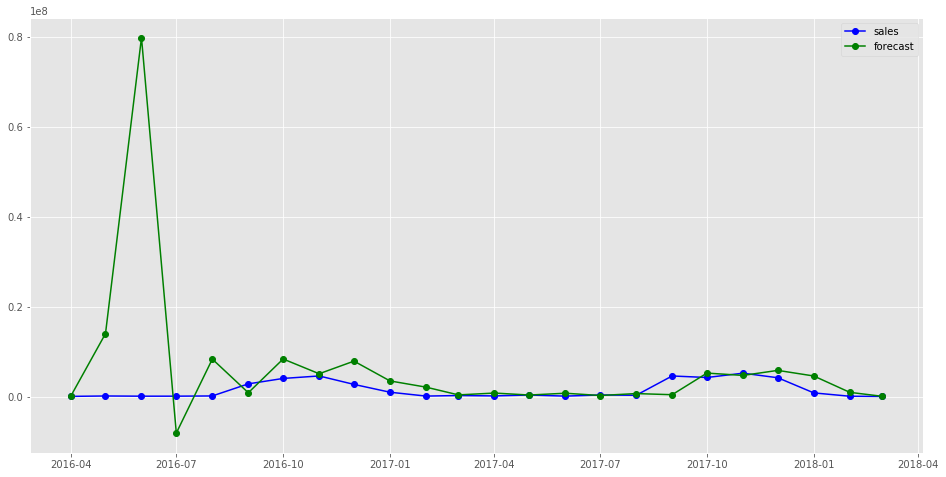

In [19]:
plt.figure(figsize=(16,8))
plt.plot(series["'2000100012001"], c="blue", marker="o", label='sales' )
plt.plot(series['M_triple expo'], "g-o", label='forecast')
plt.legend(loc='best')
plt.style.use("ggplot")
plt.show()

In [20]:
def A_initial_trend(series, slen):
    sum = 0.0
    for i in range(slen):
        sum += float(series[i+slen] - series[i]) / slen
    return sum / slen
def A_initial_seasonal_components(series, slen):
    seasonals = {}
    season_averages = []
    n_seasons = int(len(series)/slen)
    # compute season averages
    for j in range(n_seasons):
        season_averages.append(sum(series[slen*j:slen*j+slen])/float(slen))
    # compute initial values
    for i in range(slen):
        sum_of_vals_over_avg = 0.0
        for j in range(n_seasons):
            sum_of_vals_over_avg += series[slen*j+i]-season_averages[j]
        seasonals[i] = sum_of_vals_over_avg/n_seasons
    return seasonals
def A_triple_exponential_smoothing(series, slenL, slenU, alphaL, alphaU, betaL, betaU, gammaL, gammaU, n_preds):
    alphal=int(10*alphaL)
    alphau=int(10*alphaU)
    betal=int(10*betaL)
    betau=int(10*betaU)
    gammal=int(10*gammaL)
    gammau=int(10*gammaU)
    min = 999999999999999
    min2=999999999999999
    for slen in range (slenL, slenU+1):
        try:
            for alpha in range (alphal, alphau+1):
                for beta in range (betal, betau+1):
                    for gamma in range (gammal, gammau+1):
                        result=[]
                        seasonals = A_initial_seasonal_components(series, slen)
                        for i in range(len(series)+n_preds):
                            if i == 0: # initial values
                                smooth = series[0]
                                trend = A_initial_trend(series, slen)
                                result.append(series[0])
                                continue
                            if i >= len(series): # we are forecasting
                                m = i - len(series) + 1
                                result.append((smooth + m*trend) + seasonals[i%slen])
                            else:
                                val = series[i-1]
                                last_smooth, smooth = smooth, (alpha/10.0)*(val-seasonals[i%slen]) + (1-(alpha/10.0))*(smooth+trend)
                                trend = (beta/10.0) * (smooth-last_smooth) + (1-(beta/10.0))*trend
                                seasonals[i%slen] = (gamma/10.0)*(val-smooth) + (1-(gamma/10.0))*seasonals[i%slen]
                                result.append(smooth+trend+seasonals[i%slen])
                        mape=mean_absolute_percentage_error(series,result)
                        #print result
                        if (0<=mape<min):
                            min=mape
                            minalpha=(alpha/10.0)
                            minbeta=(beta/10.0)
                            mingamma=(gamma/10.0)
                            minr=result
                        print ('alpha {} - beta {} - gamma {} - mape {}'.format((alpha/10.0),(beta/10.0),(gamma/10.0),mape))
            print('best alpha {} - best beta {} - best gamma {} - mape {} - slen {}'.format(minalpha,minbeta,mingamma,min,slen))
        except:
            continue
        if (0<=min<min2):
            min2=min
            bestalpha=minalpha
            bestbeta=minbeta
            bestgamma=mingamma
            bestslen=slen
            bestr=minr
    absolute_error=(min2/100)*sum(bestr)
    forecast_sum=sum(bestr)
    print ('A {} - B {} - G {} - M {} - S {} - AE {} - FS {}'.format(bestalpha,bestbeta,bestgamma,min2,bestslen,absolute_error,forecast_sum))
    return bestr

In [22]:
A_triple_expo =  A_triple_exponential_smoothing(series["'2000100012001"],2, 12, 0.1, 0.9, 0.1, 0.9, 0.1, 0.9, 0)
series['A_triple expo'] = A_triple_expo

alpha 0.1 - beta 0.1 - gamma 0.1 - mape 120.62806980795591
alpha 0.1 - beta 0.1 - gamma 0.2 - mape 110.0723729350511
alpha 0.1 - beta 0.1 - gamma 0.3 - mape 99.87721407281084
alpha 0.1 - beta 0.1 - gamma 0.4 - mape 91.89718418976796
alpha 0.1 - beta 0.1 - gamma 0.5 - mape 85.19909742722487
alpha 0.1 - beta 0.1 - gamma 0.6 - mape 79.23065539785215
alpha 0.1 - beta 0.1 - gamma 0.7 - mape 73.0973889679246
alpha 0.1 - beta 0.1 - gamma 0.8 - mape 66.9448234858521
alpha 0.1 - beta 0.1 - gamma 0.9 - mape 60.52615038826886
alpha 0.1 - beta 0.2 - gamma 0.1 - mape 114.81847743066884
alpha 0.1 - beta 0.2 - gamma 0.2 - mape 106.8359200851318
alpha 0.1 - beta 0.2 - gamma 0.3 - mape 98.68783576851257
alpha 0.1 - beta 0.2 - gamma 0.4 - mape 91.07982908880143
alpha 0.1 - beta 0.2 - gamma 0.5 - mape 85.06091968982254
alpha 0.1 - beta 0.2 - gamma 0.6 - mape 79.08126510328904
alpha 0.1 - beta 0.2 - gamma 0.7 - mape 72.89673506975679
alpha 0.1 - beta 0.2 - gamma 0.8 - mape 66.69179345052729
alpha 0.1 - be

alpha 0.3 - beta 0.1 - gamma 0.5 - mape 76.31583801744021
alpha 0.3 - beta 0.1 - gamma 0.6 - mape 71.89115395620476
alpha 0.3 - beta 0.1 - gamma 0.7 - mape 67.26126649397757
alpha 0.3 - beta 0.1 - gamma 0.8 - mape 62.50976797686902
alpha 0.3 - beta 0.1 - gamma 0.9 - mape 58.55504246637584
alpha 0.3 - beta 0.2 - gamma 0.1 - mape 96.08463802919537
alpha 0.3 - beta 0.2 - gamma 0.2 - mape 91.43148928326632
alpha 0.3 - beta 0.2 - gamma 0.3 - mape 86.49466690546254
alpha 0.3 - beta 0.2 - gamma 0.4 - mape 81.79059570174178
alpha 0.3 - beta 0.2 - gamma 0.5 - mape 77.00078480224775
alpha 0.3 - beta 0.2 - gamma 0.6 - mape 71.99966891483824
alpha 0.3 - beta 0.2 - gamma 0.7 - mape 66.86925197131252
alpha 0.3 - beta 0.2 - gamma 0.8 - mape 61.70987410670756
alpha 0.3 - beta 0.2 - gamma 0.9 - mape 58.17794765609633
alpha 0.3 - beta 0.3 - gamma 0.1 - mape 99.85375488184651
alpha 0.3 - beta 0.3 - gamma 0.2 - mape 93.91846792270529
alpha 0.3 - beta 0.3 - gamma 0.3 - mape 88.9073406864687
alpha 0.3 - bet

alpha 0.5 - beta 0.6 - gamma 0.1 - mape 79.633189462616
alpha 0.5 - beta 0.6 - gamma 0.2 - mape 77.64334002722731
alpha 0.5 - beta 0.6 - gamma 0.3 - mape 76.08489259531271
alpha 0.5 - beta 0.6 - gamma 0.4 - mape 74.2936356632568
alpha 0.5 - beta 0.6 - gamma 0.5 - mape 72.41301302876163
alpha 0.5 - beta 0.6 - gamma 0.6 - mape 70.45739049326804
alpha 0.5 - beta 0.6 - gamma 0.7 - mape 68.44327107153887
alpha 0.5 - beta 0.6 - gamma 0.8 - mape 66.55160301643404
alpha 0.5 - beta 0.6 - gamma 0.9 - mape 65.23989907626407
alpha 0.5 - beta 0.7 - gamma 0.1 - mape 81.84369421264648
alpha 0.5 - beta 0.7 - gamma 0.2 - mape 80.27445003473436
alpha 0.5 - beta 0.7 - gamma 0.3 - mape 78.31201952364151
alpha 0.5 - beta 0.7 - gamma 0.4 - mape 76.15525011111183
alpha 0.5 - beta 0.7 - gamma 0.5 - mape 73.93554873419625
alpha 0.5 - beta 0.7 - gamma 0.6 - mape 71.76123980029513
alpha 0.5 - beta 0.7 - gamma 0.7 - mape 69.72248003863245
alpha 0.5 - beta 0.7 - gamma 0.8 - mape 68.53344277138407
alpha 0.5 - beta 

alpha 0.7 - beta 0.3 - gamma 0.8 - mape 60.069558682293575
alpha 0.7 - beta 0.3 - gamma 0.9 - mape 59.22288182511711
alpha 0.7 - beta 0.4 - gamma 0.1 - mape 68.94145585467109
alpha 0.7 - beta 0.4 - gamma 0.2 - mape 68.15322541930917
alpha 0.7 - beta 0.4 - gamma 0.3 - mape 67.23583439748944
alpha 0.7 - beta 0.4 - gamma 0.4 - mape 66.23289712399423
alpha 0.7 - beta 0.4 - gamma 0.5 - mape 65.17306955811135
alpha 0.7 - beta 0.4 - gamma 0.6 - mape 64.07541474458228
alpha 0.7 - beta 0.4 - gamma 0.7 - mape 62.97737976588543
alpha 0.7 - beta 0.4 - gamma 0.8 - mape 61.94264570818942
alpha 0.7 - beta 0.4 - gamma 0.9 - mape 61.08857299520649
alpha 0.7 - beta 0.5 - gamma 0.1 - mape 71.20206170912438
alpha 0.7 - beta 0.5 - gamma 0.2 - mape 70.23209990673327
alpha 0.7 - beta 0.5 - gamma 0.3 - mape 69.10786675932617
alpha 0.7 - beta 0.5 - gamma 0.4 - mape 67.90946109794125
alpha 0.7 - beta 0.5 - gamma 0.5 - mape 66.7634141930578
alpha 0.7 - beta 0.5 - gamma 0.6 - mape 65.56432596179336
alpha 0.7 - be

alpha 0.9 - beta 0.5 - gamma 0.3 - mape 66.18953652861475
alpha 0.9 - beta 0.5 - gamma 0.4 - mape 65.99434537790052
alpha 0.9 - beta 0.5 - gamma 0.5 - mape 65.80511307931603
alpha 0.9 - beta 0.5 - gamma 0.6 - mape 65.62313635820384
alpha 0.9 - beta 0.5 - gamma 0.7 - mape 65.44949553718988
alpha 0.9 - beta 0.5 - gamma 0.8 - mape 65.35963037813691
alpha 0.9 - beta 0.5 - gamma 0.9 - mape 65.3399634116456
alpha 0.9 - beta 0.6 - gamma 0.1 - mape 70.24702863770491
alpha 0.9 - beta 0.6 - gamma 0.2 - mape 70.0492515022178
alpha 0.9 - beta 0.6 - gamma 0.3 - mape 69.86340478110439
alpha 0.9 - beta 0.6 - gamma 0.4 - mape 69.6907913710644
alpha 0.9 - beta 0.6 - gamma 0.5 - mape 69.53245770498297
alpha 0.9 - beta 0.6 - gamma 0.6 - mape 69.38922208212176
alpha 0.9 - beta 0.6 - gamma 0.7 - mape 69.26169932790482
alpha 0.9 - beta 0.6 - gamma 0.8 - mape 69.15032231286214
alpha 0.9 - beta 0.6 - gamma 0.9 - mape 69.05536080508895
alpha 0.9 - beta 0.7 - gamma 0.1 - mape 73.43466601153231
alpha 0.9 - beta 

alpha 0.2 - beta 0.7 - gamma 0.4 - mape 97.64836132783094
alpha 0.2 - beta 0.7 - gamma 0.5 - mape 89.70461070303818
alpha 0.2 - beta 0.7 - gamma 0.6 - mape 82.09621127628604
alpha 0.2 - beta 0.7 - gamma 0.7 - mape 74.79230811702593
alpha 0.2 - beta 0.7 - gamma 0.8 - mape 68.43852708806637
alpha 0.2 - beta 0.7 - gamma 0.9 - mape 65.92932911912558
alpha 0.2 - beta 0.8 - gamma 0.1 - mape 122.5168106104956
alpha 0.2 - beta 0.8 - gamma 0.2 - mape 114.47920382660742
alpha 0.2 - beta 0.8 - gamma 0.3 - mape 106.23085384267145
alpha 0.2 - beta 0.8 - gamma 0.4 - mape 97.79169698184018
alpha 0.2 - beta 0.8 - gamma 0.5 - mape 89.70637297649427
alpha 0.2 - beta 0.8 - gamma 0.6 - mape 82.14181872221522
alpha 0.2 - beta 0.8 - gamma 0.7 - mape 74.31432584733572
alpha 0.2 - beta 0.8 - gamma 0.8 - mape 69.6944651733295
alpha 0.2 - beta 0.8 - gamma 0.9 - mape 67.7763171080508
alpha 0.2 - beta 0.9 - gamma 0.1 - mape 123.29960795516632
alpha 0.2 - beta 0.9 - gamma 0.2 - mape 114.53088044508193
alpha 0.2 - 

alpha 0.4 - beta 0.7 - gamma 0.9 - mape 70.22260900415573
alpha 0.4 - beta 0.8 - gamma 0.1 - mape 86.47912189360778
alpha 0.4 - beta 0.8 - gamma 0.2 - mape 84.07409854533638
alpha 0.4 - beta 0.8 - gamma 0.3 - mape 82.46472724875657
alpha 0.4 - beta 0.8 - gamma 0.4 - mape 80.8092500443247
alpha 0.4 - beta 0.8 - gamma 0.5 - mape 78.90188805655953
alpha 0.4 - beta 0.8 - gamma 0.6 - mape 76.77179839305586
alpha 0.4 - beta 0.8 - gamma 0.7 - mape 74.81198449365887
alpha 0.4 - beta 0.8 - gamma 0.8 - mape 73.62726996074282
alpha 0.4 - beta 0.8 - gamma 0.9 - mape 74.16352406437217
alpha 0.4 - beta 0.9 - gamma 0.1 - mape 88.1151201576405
alpha 0.4 - beta 0.9 - gamma 0.2 - mape 86.58671785676331
alpha 0.4 - beta 0.9 - gamma 0.3 - mape 84.71189720055575
alpha 0.4 - beta 0.9 - gamma 0.4 - mape 82.57052338186266
alpha 0.4 - beta 0.9 - gamma 0.5 - mape 80.20708989426211
alpha 0.4 - beta 0.9 - gamma 0.6 - mape 78.24297319449796
alpha 0.4 - beta 0.9 - gamma 0.7 - mape 77.02627256405104
alpha 0.4 - beta

alpha 0.6 - beta 0.9 - gamma 0.8 - mape 75.59413682461617
alpha 0.6 - beta 0.9 - gamma 0.9 - mape 74.60293724996892
alpha 0.7 - beta 0.1 - gamma 0.1 - mape 63.097436922056694
alpha 0.7 - beta 0.1 - gamma 0.2 - mape 61.549263858046686
alpha 0.7 - beta 0.1 - gamma 0.3 - mape 60.051181815664975
alpha 0.7 - beta 0.1 - gamma 0.4 - mape 58.56643031681348
alpha 0.7 - beta 0.1 - gamma 0.5 - mape 57.10874204437183
alpha 0.7 - beta 0.1 - gamma 0.6 - mape 56.27829447003888
alpha 0.7 - beta 0.1 - gamma 0.7 - mape 55.4432770281324
alpha 0.7 - beta 0.1 - gamma 0.8 - mape 54.60590160493063
alpha 0.7 - beta 0.1 - gamma 0.9 - mape 54.034036522771466
alpha 0.7 - beta 0.2 - gamma 0.1 - mape 64.01162287871658
alpha 0.7 - beta 0.2 - gamma 0.2 - mape 62.15248492718957
alpha 0.7 - beta 0.2 - gamma 0.3 - mape 60.408588049847324
alpha 0.7 - beta 0.2 - gamma 0.4 - mape 59.44436952080405
alpha 0.7 - beta 0.2 - gamma 0.5 - mape 58.96440830045028
alpha 0.7 - beta 0.2 - gamma 0.6 - mape 58.43882577748951
alpha 0.7 

alpha 0.8 - beta 0.9 - gamma 0.6 - mape 73.77282938073631
alpha 0.8 - beta 0.9 - gamma 0.7 - mape 73.07311594639401
alpha 0.8 - beta 0.9 - gamma 0.8 - mape 72.40081150701923
alpha 0.8 - beta 0.9 - gamma 0.9 - mape 71.7170781460543
alpha 0.9 - beta 0.1 - gamma 0.1 - mape 54.49545595022042
alpha 0.9 - beta 0.1 - gamma 0.2 - mape 54.394204656757985
alpha 0.9 - beta 0.1 - gamma 0.3 - mape 54.34242774313828
alpha 0.9 - beta 0.1 - gamma 0.4 - mape 54.28432740451652
alpha 0.9 - beta 0.1 - gamma 0.5 - mape 54.220366480584914
alpha 0.9 - beta 0.1 - gamma 0.6 - mape 54.15101007317769
alpha 0.9 - beta 0.1 - gamma 0.7 - mape 54.07672315083178
alpha 0.9 - beta 0.1 - gamma 0.8 - mape 53.9979683194118
alpha 0.9 - beta 0.1 - gamma 0.9 - mape 53.91520375673383
alpha 0.9 - beta 0.2 - gamma 0.1 - mape 58.18046078766744
alpha 0.9 - beta 0.2 - gamma 0.2 - mape 58.05289954410816
alpha 0.9 - beta 0.2 - gamma 0.3 - mape 57.920248678132914
alpha 0.9 - beta 0.2 - gamma 0.4 - mape 57.78311509745048
alpha 0.9 - b

alpha 0.2 - beta 0.9 - gamma 0.8 - mape 75.65227956931821
alpha 0.2 - beta 0.9 - gamma 0.9 - mape 75.61924918429874
alpha 0.3 - beta 0.1 - gamma 0.1 - mape 74.94948893864598
alpha 0.3 - beta 0.1 - gamma 0.2 - mape 72.86756717206944
alpha 0.3 - beta 0.1 - gamma 0.3 - mape 71.09013274714486
alpha 0.3 - beta 0.1 - gamma 0.4 - mape 68.97090432136623
alpha 0.3 - beta 0.1 - gamma 0.5 - mape 66.52059254588237
alpha 0.3 - beta 0.1 - gamma 0.6 - mape 63.75271530809169
alpha 0.3 - beta 0.1 - gamma 0.7 - mape 60.684116032241285
alpha 0.3 - beta 0.1 - gamma 0.8 - mape 57.646168107828544
alpha 0.3 - beta 0.1 - gamma 0.9 - mape 55.28984305869934
alpha 0.3 - beta 0.2 - gamma 0.1 - mape 84.13927912085354
alpha 0.3 - beta 0.2 - gamma 0.2 - mape 80.35666951420754
alpha 0.3 - beta 0.2 - gamma 0.3 - mape 77.40514701251932
alpha 0.3 - beta 0.2 - gamma 0.4 - mape 74.30619590606862
alpha 0.3 - beta 0.2 - gamma 0.5 - mape 71.15887750291913
alpha 0.3 - beta 0.2 - gamma 0.6 - mape 67.90764470822988
alpha 0.3 - 

alpha 0.5 - beta 0.4 - gamma 0.4 - mape 70.76955874137427
alpha 0.5 - beta 0.4 - gamma 0.5 - mape 69.30059401890819
alpha 0.5 - beta 0.4 - gamma 0.6 - mape 68.23104132394633
alpha 0.5 - beta 0.4 - gamma 0.7 - mape 67.25858803673532
alpha 0.5 - beta 0.4 - gamma 0.8 - mape 66.277029758092
alpha 0.5 - beta 0.4 - gamma 0.9 - mape 65.82590890737376
alpha 0.5 - beta 0.5 - gamma 0.1 - mape 78.42770587481824
alpha 0.5 - beta 0.5 - gamma 0.2 - mape 76.61142990362447
alpha 0.5 - beta 0.5 - gamma 0.3 - mape 74.81305191363728
alpha 0.5 - beta 0.5 - gamma 0.4 - mape 73.80694671898135
alpha 0.5 - beta 0.5 - gamma 0.5 - mape 72.89083689149727
alpha 0.5 - beta 0.5 - gamma 0.6 - mape 71.8325212973362
alpha 0.5 - beta 0.5 - gamma 0.7 - mape 70.67781923471672
alpha 0.5 - beta 0.5 - gamma 0.8 - mape 69.92712233680511
alpha 0.5 - beta 0.5 - gamma 0.9 - mape 69.26277676681063
alpha 0.5 - beta 0.6 - gamma 0.1 - mape 80.25110527241979
alpha 0.5 - beta 0.6 - gamma 0.2 - mape 79.10957314286338
alpha 0.5 - beta 

alpha 0.7 - beta 0.6 - gamma 0.3 - mape 71.59069780247246
alpha 0.7 - beta 0.6 - gamma 0.4 - mape 71.31062309502836
alpha 0.7 - beta 0.6 - gamma 0.5 - mape 71.39966563577367
alpha 0.7 - beta 0.6 - gamma 0.6 - mape 71.5514387783671
alpha 0.7 - beta 0.6 - gamma 0.7 - mape 71.77386469749318
alpha 0.7 - beta 0.6 - gamma 0.8 - mape 72.02400511962017
alpha 0.7 - beta 0.6 - gamma 0.9 - mape 72.2069834773292
alpha 0.7 - beta 0.7 - gamma 0.1 - mape 75.13867676605211
alpha 0.7 - beta 0.7 - gamma 0.2 - mape 75.23881194959395
alpha 0.7 - beta 0.7 - gamma 0.3 - mape 75.27666100277608
alpha 0.7 - beta 0.7 - gamma 0.4 - mape 75.274572803498
alpha 0.7 - beta 0.7 - gamma 0.5 - mape 75.17264882696546
alpha 0.7 - beta 0.7 - gamma 0.6 - mape 75.15626505853632
alpha 0.7 - beta 0.7 - gamma 0.7 - mape 75.07161245287375
alpha 0.7 - beta 0.7 - gamma 0.8 - mape 75.30676590113886
alpha 0.7 - beta 0.7 - gamma 0.9 - mape 76.05471854773465
alpha 0.7 - beta 0.8 - gamma 0.1 - mape 78.68337920491638
alpha 0.7 - beta 0

alpha 0.9 - beta 0.4 - gamma 0.8 - mape 62.72823732373446
alpha 0.9 - beta 0.4 - gamma 0.9 - mape 62.62234690511564
alpha 0.9 - beta 0.5 - gamma 0.1 - mape 66.84624565535633
alpha 0.9 - beta 0.5 - gamma 0.2 - mape 66.81038851387423
alpha 0.9 - beta 0.5 - gamma 0.3 - mape 66.76287924124463
alpha 0.9 - beta 0.5 - gamma 0.4 - mape 66.7041121807703
alpha 0.9 - beta 0.5 - gamma 0.5 - mape 66.63445035753286
alpha 0.9 - beta 0.5 - gamma 0.6 - mape 66.55422648482738
alpha 0.9 - beta 0.5 - gamma 0.7 - mape 66.48018732255214
alpha 0.9 - beta 0.5 - gamma 0.8 - mape 66.41254747626041
alpha 0.9 - beta 0.5 - gamma 0.9 - mape 66.4285511051309
alpha 0.9 - beta 0.6 - gamma 0.1 - mape 70.33142698784089
alpha 0.9 - beta 0.6 - gamma 0.2 - mape 70.37093480854364
alpha 0.9 - beta 0.6 - gamma 0.3 - mape 70.39728778410566
alpha 0.9 - beta 0.6 - gamma 0.4 - mape 70.41095606898038
alpha 0.9 - beta 0.6 - gamma 0.5 - mape 70.41237128003752
alpha 0.9 - beta 0.6 - gamma 0.6 - mape 70.40192777241136
alpha 0.9 - beta

alpha 0.2 - beta 0.6 - gamma 0.3 - mape 104.96546424653064
alpha 0.2 - beta 0.6 - gamma 0.4 - mape 99.13598493465953
alpha 0.2 - beta 0.6 - gamma 0.5 - mape 93.37349740096761
alpha 0.2 - beta 0.6 - gamma 0.6 - mape 87.0041281263699
alpha 0.2 - beta 0.6 - gamma 0.7 - mape 79.9654453822145
alpha 0.2 - beta 0.6 - gamma 0.8 - mape 73.29890544138323
alpha 0.2 - beta 0.6 - gamma 0.9 - mape 68.64196560533465
alpha 0.2 - beta 0.7 - gamma 0.1 - mape 120.1772782651972
alpha 0.2 - beta 0.7 - gamma 0.2 - mape 113.42235352235835
alpha 0.2 - beta 0.7 - gamma 0.3 - mape 107.86166308665727
alpha 0.2 - beta 0.7 - gamma 0.4 - mape 101.81324877875724
alpha 0.2 - beta 0.7 - gamma 0.5 - mape 95.18671763453702
alpha 0.2 - beta 0.7 - gamma 0.6 - mape 87.9257135955448
alpha 0.2 - beta 0.7 - gamma 0.7 - mape 80.12206030169571
alpha 0.2 - beta 0.7 - gamma 0.8 - mape 74.76186468468168
alpha 0.2 - beta 0.7 - gamma 0.9 - mape 70.2729664121226
alpha 0.2 - beta 0.8 - gamma 0.1 - mape 121.61494975584857
alpha 0.2 - b

alpha 0.5 - beta 0.1 - gamma 0.2 - mape 68.43545036340484
alpha 0.5 - beta 0.1 - gamma 0.3 - mape 66.47426915618499
alpha 0.5 - beta 0.1 - gamma 0.4 - mape 64.3832947252923
alpha 0.5 - beta 0.1 - gamma 0.5 - mape 62.16989420405097
alpha 0.5 - beta 0.1 - gamma 0.6 - mape 59.84257634621438
alpha 0.5 - beta 0.1 - gamma 0.7 - mape 57.68072519781827
alpha 0.5 - beta 0.1 - gamma 0.8 - mape 56.2328845211501
alpha 0.5 - beta 0.1 - gamma 0.9 - mape 54.68481489472923
alpha 0.5 - beta 0.2 - gamma 0.1 - mape 76.85238263191066
alpha 0.5 - beta 0.2 - gamma 0.2 - mape 74.32891346429051
alpha 0.5 - beta 0.2 - gamma 0.3 - mape 71.67841356178806
alpha 0.5 - beta 0.2 - gamma 0.4 - mape 68.89630986528134
alpha 0.5 - beta 0.2 - gamma 0.5 - mape 65.97877435723223
alpha 0.5 - beta 0.2 - gamma 0.6 - mape 62.92284397281216
alpha 0.5 - beta 0.2 - gamma 0.7 - mape 60.0769732595152
alpha 0.5 - beta 0.2 - gamma 0.8 - mape 58.104013028083756
alpha 0.5 - beta 0.2 - gamma 0.9 - mape 57.31833413562701
alpha 0.5 - beta

alpha 0.1 - beta 0.4 - gamma 0.8 - mape 67.28862368618351
alpha 0.1 - beta 0.4 - gamma 0.9 - mape 62.189220342224274
alpha 0.1 - beta 0.5 - gamma 0.1 - mape 96.22522990080532
alpha 0.1 - beta 0.5 - gamma 0.2 - mape 94.82205452090841
alpha 0.1 - beta 0.5 - gamma 0.3 - mape 92.41758505851911
alpha 0.1 - beta 0.5 - gamma 0.4 - mape 88.95935583852317
alpha 0.1 - beta 0.5 - gamma 0.5 - mape 84.65292035975698
alpha 0.1 - beta 0.5 - gamma 0.6 - mape 79.63877647090915
alpha 0.1 - beta 0.5 - gamma 0.7 - mape 75.15887689000681
alpha 0.1 - beta 0.5 - gamma 0.8 - mape 70.30446631253278
alpha 0.1 - beta 0.5 - gamma 0.9 - mape 64.28678294951324
alpha 0.1 - beta 0.6 - gamma 0.1 - mape 104.46539117350247
alpha 0.1 - beta 0.6 - gamma 0.2 - mape 102.18743547623018
alpha 0.1 - beta 0.6 - gamma 0.3 - mape 99.1798006581439
alpha 0.1 - beta 0.6 - gamma 0.4 - mape 95.19652021508972
alpha 0.1 - beta 0.6 - gamma 0.5 - mape 90.16913811201978
alpha 0.1 - beta 0.6 - gamma 0.6 - mape 84.04875666872293
alpha 0.1 - 

alpha 0.3 - beta 0.7 - gamma 0.5 - mape 79.87684596151918
alpha 0.3 - beta 0.7 - gamma 0.6 - mape 76.99729865911567
alpha 0.3 - beta 0.7 - gamma 0.7 - mape 74.79512113893108
alpha 0.3 - beta 0.7 - gamma 0.8 - mape 73.458643527058
alpha 0.3 - beta 0.7 - gamma 0.9 - mape 74.23055414385968
alpha 0.3 - beta 0.8 - gamma 0.1 - mape 94.40147590227281
alpha 0.3 - beta 0.8 - gamma 0.2 - mape 89.94029791129094
alpha 0.3 - beta 0.8 - gamma 0.3 - mape 86.67548505366767
alpha 0.3 - beta 0.8 - gamma 0.4 - mape 83.23026446248208
alpha 0.3 - beta 0.8 - gamma 0.5 - mape 80.58934347564069
alpha 0.3 - beta 0.8 - gamma 0.6 - mape 78.26215234931864
alpha 0.3 - beta 0.8 - gamma 0.7 - mape 76.19426859058797
alpha 0.3 - beta 0.8 - gamma 0.8 - mape 76.13607191798766
alpha 0.3 - beta 0.8 - gamma 0.9 - mape 77.27619140132755
alpha 0.3 - beta 0.9 - gamma 0.1 - mape 92.4311642286397
alpha 0.3 - beta 0.9 - gamma 0.2 - mape 89.39859454545297
alpha 0.3 - beta 0.9 - gamma 0.3 - mape 85.82289701576453
alpha 0.3 - beta 

alpha 0.7 - beta 0.9 - gamma 0.9 - mape 89.14394242558284
alpha 0.8 - beta 0.1 - gamma 0.1 - mape 55.53930547491569
alpha 0.8 - beta 0.1 - gamma 0.2 - mape 55.36030696697758
alpha 0.8 - beta 0.1 - gamma 0.3 - mape 55.336759554830316
alpha 0.8 - beta 0.1 - gamma 0.4 - mape 55.28325203802027
alpha 0.8 - beta 0.1 - gamma 0.5 - mape 55.201421706288556
alpha 0.8 - beta 0.1 - gamma 0.6 - mape 55.092925334421494
alpha 0.8 - beta 0.1 - gamma 0.7 - mape 54.959435573710294
alpha 0.8 - beta 0.1 - gamma 0.8 - mape 54.82536565044068
alpha 0.8 - beta 0.1 - gamma 0.9 - mape 54.91547924773378
alpha 0.8 - beta 0.2 - gamma 0.1 - mape 58.23552931244973
alpha 0.8 - beta 0.2 - gamma 0.2 - mape 58.05271571509415
alpha 0.8 - beta 0.2 - gamma 0.3 - mape 58.01976520800349
alpha 0.8 - beta 0.2 - gamma 0.4 - mape 58.3349451473223
alpha 0.8 - beta 0.2 - gamma 0.5 - mape 58.64106583613376
alpha 0.8 - beta 0.2 - gamma 0.6 - mape 58.91066467204741
alpha 0.8 - beta 0.2 - gamma 0.7 - mape 59.145511782687734
alpha 0.8 

alpha 0.9 - beta 0.8 - gamma 0.8 - mape 94.59434556748317
alpha 0.9 - beta 0.8 - gamma 0.9 - mape 94.7785122144676
alpha 0.9 - beta 0.9 - gamma 0.1 - mape 100.11992836233266
alpha 0.9 - beta 0.9 - gamma 0.2 - mape 100.25256762563737
alpha 0.9 - beta 0.9 - gamma 0.3 - mape 100.37567362601581
alpha 0.9 - beta 0.9 - gamma 0.4 - mape 100.48990340982671
alpha 0.9 - beta 0.9 - gamma 0.5 - mape 100.59593324583986
alpha 0.9 - beta 0.9 - gamma 0.6 - mape 100.69445845830731
alpha 0.9 - beta 0.9 - gamma 0.7 - mape 100.78619325743487
alpha 0.9 - beta 0.9 - gamma 0.8 - mape 100.87187056802094
alpha 0.9 - beta 0.9 - gamma 0.9 - mape 100.9522418570529
best alpha 0.9 - best beta 0.1 - best gamma 0.9 - mape 52.99642549214024 - slen 6
alpha 0.1 - beta 0.1 - gamma 0.1 - mape 102.82758164639884
alpha 0.1 - beta 0.1 - gamma 0.2 - mape 98.82995154839669
alpha 0.1 - beta 0.1 - gamma 0.3 - mape 93.83883592600907
alpha 0.1 - beta 0.1 - gamma 0.4 - mape 87.87914551089902
alpha 0.1 - beta 0.1 - gamma 0.5 - mape 

alpha 0.2 - beta 0.9 - gamma 0.6 - mape 95.54102203125476
alpha 0.2 - beta 0.9 - gamma 0.7 - mape 89.86877274025692
alpha 0.2 - beta 0.9 - gamma 0.8 - mape 88.36700020300766
alpha 0.2 - beta 0.9 - gamma 0.9 - mape 90.25438820589059
alpha 0.3 - beta 0.1 - gamma 0.1 - mape 90.75201969195791
alpha 0.3 - beta 0.1 - gamma 0.2 - mape 88.65110131484994
alpha 0.3 - beta 0.1 - gamma 0.3 - mape 85.96303013728523
alpha 0.3 - beta 0.1 - gamma 0.4 - mape 82.71095586086219
alpha 0.3 - beta 0.1 - gamma 0.5 - mape 78.91574737081079
alpha 0.3 - beta 0.1 - gamma 0.6 - mape 74.597182002532
alpha 0.3 - beta 0.1 - gamma 0.7 - mape 69.77488026603349
alpha 0.3 - beta 0.1 - gamma 0.8 - mape 64.4690257392893
alpha 0.3 - beta 0.1 - gamma 0.9 - mape 59.225861439769986
alpha 0.3 - beta 0.2 - gamma 0.1 - mape 96.59615576811935
alpha 0.3 - beta 0.2 - gamma 0.2 - mape 94.14072080222388
alpha 0.3 - beta 0.2 - gamma 0.3 - mape 91.04446106158056
alpha 0.3 - beta 0.2 - gamma 0.4 - mape 87.32923692340987
alpha 0.3 - beta

alpha 0.6 - beta 0.9 - gamma 0.5 - mape 84.93649941216098
alpha 0.6 - beta 0.9 - gamma 0.6 - mape 85.39899407028452
alpha 0.6 - beta 0.9 - gamma 0.7 - mape 85.95093218052625
alpha 0.6 - beta 0.9 - gamma 0.8 - mape 86.76643591130428
alpha 0.6 - beta 0.9 - gamma 0.9 - mape 87.6059635086724
alpha 0.7 - beta 0.1 - gamma 0.1 - mape 65.91713015306281
alpha 0.7 - beta 0.1 - gamma 0.2 - mape 64.25022329964476
alpha 0.7 - beta 0.1 - gamma 0.3 - mape 62.6020487166873
alpha 0.7 - beta 0.1 - gamma 0.4 - mape 61.00435266831848
alpha 0.7 - beta 0.1 - gamma 0.5 - mape 59.682370606279136
alpha 0.7 - beta 0.1 - gamma 0.6 - mape 58.69217383895784
alpha 0.7 - beta 0.1 - gamma 0.7 - mape 57.66783057326567
alpha 0.7 - beta 0.1 - gamma 0.8 - mape 56.962306601910186
alpha 0.7 - beta 0.1 - gamma 0.9 - mape 56.6575351752003
alpha 0.7 - beta 0.2 - gamma 0.1 - mape 65.9962673005563
alpha 0.7 - beta 0.2 - gamma 0.2 - mape 64.38384792485327
alpha 0.7 - beta 0.2 - gamma 0.3 - mape 63.31074566885063
alpha 0.7 - beta

alpha 0.9 - beta 0.5 - gamma 0.5 - mape 74.2947005125313
alpha 0.9 - beta 0.5 - gamma 0.6 - mape 74.55658675298635
alpha 0.9 - beta 0.5 - gamma 0.7 - mape 74.81573570297545
alpha 0.9 - beta 0.5 - gamma 0.8 - mape 75.07224716829842
alpha 0.9 - beta 0.5 - gamma 0.9 - mape 75.32622009125505
alpha 0.9 - beta 0.6 - gamma 0.1 - mape 79.73539939637837
alpha 0.9 - beta 0.6 - gamma 0.2 - mape 79.92032714876702
alpha 0.9 - beta 0.6 - gamma 0.3 - mape 80.10280920470696
alpha 0.9 - beta 0.6 - gamma 0.4 - mape 80.28292072943057
alpha 0.9 - beta 0.6 - gamma 0.5 - mape 80.46073545924038
alpha 0.9 - beta 0.6 - gamma 0.6 - mape 80.6363256817322
alpha 0.9 - beta 0.6 - gamma 0.7 - mape 80.80976221657129
alpha 0.9 - beta 0.6 - gamma 0.8 - mape 80.98111439680356
alpha 0.9 - beta 0.6 - gamma 0.9 - mape 81.15045005068338
alpha 0.9 - beta 0.7 - gamma 0.1 - mape 84.96129173219778
alpha 0.9 - beta 0.7 - gamma 0.2 - mape 85.07186418991523
alpha 0.9 - beta 0.7 - gamma 0.3 - mape 85.18043531590614
alpha 0.9 - beta

alpha 0.2 - beta 0.5 - gamma 0.3 - mape 117.60299321325931
alpha 0.2 - beta 0.5 - gamma 0.4 - mape 110.06409369958506
alpha 0.2 - beta 0.5 - gamma 0.5 - mape 103.58337586519339
alpha 0.2 - beta 0.5 - gamma 0.6 - mape 96.42352578474652
alpha 0.2 - beta 0.5 - gamma 0.7 - mape 89.26015259966174
alpha 0.2 - beta 0.5 - gamma 0.8 - mape 82.21999578941555
alpha 0.2 - beta 0.5 - gamma 0.9 - mape 75.37065768140869
alpha 0.2 - beta 0.6 - gamma 0.1 - mape 133.332963650731
alpha 0.2 - beta 0.6 - gamma 0.2 - mape 126.39834321892087
alpha 0.2 - beta 0.6 - gamma 0.3 - mape 119.49329314375785
alpha 0.2 - beta 0.6 - gamma 0.4 - mape 112.94616492098244
alpha 0.2 - beta 0.6 - gamma 0.5 - mape 105.94185151636724
alpha 0.2 - beta 0.6 - gamma 0.6 - mape 99.11822985600148
alpha 0.2 - beta 0.6 - gamma 0.7 - mape 92.01338113515547
alpha 0.2 - beta 0.6 - gamma 0.8 - mape 84.3973430012901
alpha 0.2 - beta 0.6 - gamma 0.9 - mape 77.45409985585418
alpha 0.2 - beta 0.7 - gamma 0.1 - mape 133.76449623260555
alpha 0.

alpha 0.5 - beta 0.1 - gamma 0.1 - mape 85.05546096248776
alpha 0.5 - beta 0.1 - gamma 0.2 - mape 82.55532383088413
alpha 0.5 - beta 0.1 - gamma 0.3 - mape 79.85700210851189
alpha 0.5 - beta 0.1 - gamma 0.4 - mape 76.959092869737
alpha 0.5 - beta 0.1 - gamma 0.5 - mape 73.86009870291488
alpha 0.5 - beta 0.1 - gamma 0.6 - mape 70.558488213126
alpha 0.5 - beta 0.1 - gamma 0.7 - mape 67.05275674855895
alpha 0.5 - beta 0.1 - gamma 0.8 - mape 63.34148779018298
alpha 0.5 - beta 0.1 - gamma 0.9 - mape 61.10362700870512
alpha 0.5 - beta 0.2 - gamma 0.1 - mape 84.84214503747016
alpha 0.5 - beta 0.2 - gamma 0.2 - mape 81.97656796009173
alpha 0.5 - beta 0.2 - gamma 0.3 - mape 78.95020191131464
alpha 0.5 - beta 0.2 - gamma 0.4 - mape 75.75910982437503
alpha 0.5 - beta 0.2 - gamma 0.5 - mape 72.43659725096748
alpha 0.5 - beta 0.2 - gamma 0.6 - mape 68.91049181128082
alpha 0.5 - beta 0.2 - gamma 0.7 - mape 65.40244864208731
alpha 0.5 - beta 0.2 - gamma 0.8 - mape 63.33944181775589
alpha 0.5 - beta 0

alpha 0.6 - beta 0.9 - gamma 0.4 - mape 80.24808025426826
alpha 0.6 - beta 0.9 - gamma 0.5 - mape 79.72455308743014
alpha 0.6 - beta 0.9 - gamma 0.6 - mape 79.08594551563517
alpha 0.6 - beta 0.9 - gamma 0.7 - mape 78.62461189021015
alpha 0.6 - beta 0.9 - gamma 0.8 - mape 78.16919539281496
alpha 0.6 - beta 0.9 - gamma 0.9 - mape 77.52309372676118
alpha 0.7 - beta 0.1 - gamma 0.1 - mape 69.57531526190918
alpha 0.7 - beta 0.1 - gamma 0.2 - mape 68.01918612077196
alpha 0.7 - beta 0.1 - gamma 0.3 - mape 66.40667624278505
alpha 0.7 - beta 0.1 - gamma 0.4 - mape 64.73753790154964
alpha 0.7 - beta 0.1 - gamma 0.5 - mape 63.01148768455383
alpha 0.7 - beta 0.1 - gamma 0.6 - mape 61.641871547315965
alpha 0.7 - beta 0.1 - gamma 0.7 - mape 60.870581706988006
alpha 0.7 - beta 0.1 - gamma 0.8 - mape 60.093741344768326
alpha 0.7 - beta 0.1 - gamma 0.9 - mape 59.562023621201696
alpha 0.7 - beta 0.2 - gamma 0.1 - mape 67.2735095785551
alpha 0.7 - beta 0.2 - gamma 0.2 - mape 65.5449143746561
alpha 0.7 - 

alpha 0.8 - beta 0.8 - gamma 0.1 - mape 76.57635756328919
alpha 0.8 - beta 0.8 - gamma 0.2 - mape 76.44237876975704
alpha 0.8 - beta 0.8 - gamma 0.3 - mape 76.27552422264422
alpha 0.8 - beta 0.8 - gamma 0.4 - mape 76.07673798194791
alpha 0.8 - beta 0.8 - gamma 0.5 - mape 75.84697287199059
alpha 0.8 - beta 0.8 - gamma 0.6 - mape 75.58718835977109
alpha 0.8 - beta 0.8 - gamma 0.7 - mape 75.32574658515829
alpha 0.8 - beta 0.8 - gamma 0.8 - mape 75.08156148331682
alpha 0.8 - beta 0.8 - gamma 0.9 - mape 75.03443691751337
alpha 0.8 - beta 0.9 - gamma 0.1 - mape 78.86556068128503
alpha 0.8 - beta 0.9 - gamma 0.2 - mape 78.60584933477972
alpha 0.8 - beta 0.9 - gamma 0.3 - mape 78.31871060928772
alpha 0.8 - beta 0.9 - gamma 0.4 - mape 78.00527598607759
alpha 0.8 - beta 0.9 - gamma 0.5 - mape 77.66667871882461
alpha 0.8 - beta 0.9 - gamma 0.6 - mape 77.30405188896401
alpha 0.8 - beta 0.9 - gamma 0.7 - mape 76.91852659926286
alpha 0.8 - beta 0.9 - gamma 0.8 - mape 76.87250222034325
alpha 0.8 - be

alpha 0.2 - beta 0.7 - gamma 0.4 - mape 92.74924413302301
alpha 0.2 - beta 0.7 - gamma 0.5 - mape 87.90968391836837
alpha 0.2 - beta 0.7 - gamma 0.6 - mape 83.37437157442142
alpha 0.2 - beta 0.7 - gamma 0.7 - mape 79.24620075350907
alpha 0.2 - beta 0.7 - gamma 0.8 - mape 75.28719597899907
alpha 0.2 - beta 0.7 - gamma 0.9 - mape 71.99151613997223
alpha 0.2 - beta 0.8 - gamma 0.1 - mape 113.1094720534312
alpha 0.2 - beta 0.8 - gamma 0.2 - mape 105.19567712196798
alpha 0.2 - beta 0.8 - gamma 0.3 - mape 99.08929775931969
alpha 0.2 - beta 0.8 - gamma 0.4 - mape 93.83150427522037
alpha 0.2 - beta 0.8 - gamma 0.5 - mape 89.08372299898193
alpha 0.2 - beta 0.8 - gamma 0.6 - mape 84.44272516593209
alpha 0.2 - beta 0.8 - gamma 0.7 - mape 80.08040017508903
alpha 0.2 - beta 0.8 - gamma 0.8 - mape 76.07639896334011
alpha 0.2 - beta 0.8 - gamma 0.9 - mape 72.70576103090426
alpha 0.2 - beta 0.9 - gamma 0.1 - mape 110.52501862948492
alpha 0.2 - beta 0.9 - gamma 0.2 - mape 104.88813058863917
alpha 0.2 -

alpha 0.5 - beta 0.5 - gamma 0.4 - mape 73.8779150274311
alpha 0.5 - beta 0.5 - gamma 0.5 - mape 72.55864284826791
alpha 0.5 - beta 0.5 - gamma 0.6 - mape 71.90892590163602
alpha 0.5 - beta 0.5 - gamma 0.7 - mape 72.90223721529523
alpha 0.5 - beta 0.5 - gamma 0.8 - mape 74.08610810138626
alpha 0.5 - beta 0.5 - gamma 0.9 - mape 75.521817577911
alpha 0.5 - beta 0.6 - gamma 0.1 - mape 81.59649070965969
alpha 0.5 - beta 0.6 - gamma 0.2 - mape 80.06244905781202
alpha 0.5 - beta 0.6 - gamma 0.3 - mape 78.76004178718136
alpha 0.5 - beta 0.6 - gamma 0.4 - mape 77.75957185569544
alpha 0.5 - beta 0.6 - gamma 0.5 - mape 76.8682882372479
alpha 0.5 - beta 0.6 - gamma 0.6 - mape 77.6464985681407
alpha 0.5 - beta 0.6 - gamma 0.7 - mape 78.57957740893123
alpha 0.5 - beta 0.6 - gamma 0.8 - mape 79.75869915517974
alpha 0.5 - beta 0.6 - gamma 0.9 - mape 80.92506573962173
alpha 0.5 - beta 0.7 - gamma 0.1 - mape 85.08058733147611
alpha 0.5 - beta 0.7 - gamma 0.2 - mape 83.68466733934473
alpha 0.5 - beta 0.

alpha 0.7 - beta 0.4 - gamma 0.7 - mape 72.01276052145482
alpha 0.7 - beta 0.4 - gamma 0.8 - mape 72.37619352105021
alpha 0.7 - beta 0.4 - gamma 0.9 - mape 72.71115713205691
alpha 0.7 - beta 0.5 - gamma 0.1 - mape 75.88454137268828
alpha 0.7 - beta 0.5 - gamma 0.2 - mape 76.05336309954862
alpha 0.7 - beta 0.5 - gamma 0.3 - mape 76.18705398808629
alpha 0.7 - beta 0.5 - gamma 0.4 - mape 76.3896095429873
alpha 0.7 - beta 0.5 - gamma 0.5 - mape 76.6300933901388
alpha 0.7 - beta 0.5 - gamma 0.6 - mape 76.91018847142497
alpha 0.7 - beta 0.5 - gamma 0.7 - mape 77.27454525575101
alpha 0.7 - beta 0.5 - gamma 0.8 - mape 77.981826601825
alpha 0.7 - beta 0.5 - gamma 0.9 - mape 79.08684623821587
alpha 0.7 - beta 0.6 - gamma 0.1 - mape 80.30024720584676
alpha 0.7 - beta 0.6 - gamma 0.2 - mape 80.51813178272819
alpha 0.7 - beta 0.6 - gamma 0.3 - mape 80.82251276859047
alpha 0.7 - beta 0.6 - gamma 0.4 - mape 81.1876904414469
alpha 0.7 - beta 0.6 - gamma 0.5 - mape 82.20020842425221
alpha 0.7 - beta 0.

alpha 0.9 - beta 0.8 - gamma 0.1 - mape 91.93482941751854
alpha 0.9 - beta 0.8 - gamma 0.2 - mape 91.84557525908657
alpha 0.9 - beta 0.8 - gamma 0.3 - mape 91.74854084317214
alpha 0.9 - beta 0.8 - gamma 0.4 - mape 91.6438269870499
alpha 0.9 - beta 0.8 - gamma 0.5 - mape 91.53153502907993
alpha 0.9 - beta 0.8 - gamma 0.6 - mape 91.41176680360336
alpha 0.9 - beta 0.8 - gamma 0.7 - mape 91.28462461616739
alpha 0.9 - beta 0.8 - gamma 0.8 - mape 91.15021121908946
alpha 0.9 - beta 0.8 - gamma 0.9 - mape 91.0086297873692
alpha 0.9 - beta 0.9 - gamma 0.1 - mape 93.49633007362768
alpha 0.9 - beta 0.9 - gamma 0.2 - mape 93.3093025919839
alpha 0.9 - beta 0.9 - gamma 0.3 - mape 93.11481657698873
alpha 0.9 - beta 0.9 - gamma 0.4 - mape 92.9130181638477
alpha 0.9 - beta 0.9 - gamma 0.5 - mape 92.70405381205471
alpha 0.9 - beta 0.9 - gamma 0.6 - mape 92.48807027352515
alpha 0.9 - beta 0.9 - gamma 0.7 - mape 92.37134726731959
alpha 0.9 - beta 0.9 - gamma 0.8 - mape 92.33114552352525
alpha 0.9 - beta 0

alpha 0.2 - beta 0.8 - gamma 0.1 - mape 86.17823718392158
alpha 0.2 - beta 0.8 - gamma 0.2 - mape 80.99743918306746
alpha 0.2 - beta 0.8 - gamma 0.3 - mape 76.15625708290129
alpha 0.2 - beta 0.8 - gamma 0.4 - mape 72.07980632690551
alpha 0.2 - beta 0.8 - gamma 0.5 - mape 68.22030411043549
alpha 0.2 - beta 0.8 - gamma 0.6 - mape 66.56453472737857
alpha 0.2 - beta 0.8 - gamma 0.7 - mape 65.3739432964039
alpha 0.2 - beta 0.8 - gamma 0.8 - mape 64.49884105675329
alpha 0.2 - beta 0.8 - gamma 0.9 - mape 64.45199650419391
alpha 0.2 - beta 0.9 - gamma 0.1 - mape 85.33254941340209
alpha 0.2 - beta 0.9 - gamma 0.2 - mape 80.11786758950221
alpha 0.2 - beta 0.9 - gamma 0.3 - mape 75.31404534722786
alpha 0.2 - beta 0.9 - gamma 0.4 - mape 71.38522705226421
alpha 0.2 - beta 0.9 - gamma 0.5 - mape 68.26645487779835
alpha 0.2 - beta 0.9 - gamma 0.6 - mape 67.06222068782952
alpha 0.2 - beta 0.9 - gamma 0.7 - mape 65.87954024423422
alpha 0.2 - beta 0.9 - gamma 0.8 - mape 64.93045546614424
alpha 0.2 - bet

alpha 0.5 - beta 0.2 - gamma 0.7 - mape 60.03238108669146
alpha 0.5 - beta 0.2 - gamma 0.8 - mape 59.169611184269996
alpha 0.5 - beta 0.2 - gamma 0.9 - mape 59.04412954606004
alpha 0.5 - beta 0.3 - gamma 0.1 - mape 68.01693099602866
alpha 0.5 - beta 0.3 - gamma 0.2 - mape 66.57042021139699
alpha 0.5 - beta 0.3 - gamma 0.3 - mape 65.49582278404313
alpha 0.5 - beta 0.3 - gamma 0.4 - mape 64.70934232082736
alpha 0.5 - beta 0.3 - gamma 0.5 - mape 63.88220606981208
alpha 0.5 - beta 0.3 - gamma 0.6 - mape 62.96565471696112
alpha 0.5 - beta 0.3 - gamma 0.7 - mape 62.26456481206739
alpha 0.5 - beta 0.3 - gamma 0.8 - mape 61.66444474804851
alpha 0.5 - beta 0.3 - gamma 0.9 - mape 61.68566414494634
alpha 0.5 - beta 0.4 - gamma 0.1 - mape 69.64753402155456
alpha 0.5 - beta 0.4 - gamma 0.2 - mape 68.44714793800026
alpha 0.5 - beta 0.4 - gamma 0.3 - mape 67.60401920599448
alpha 0.5 - beta 0.4 - gamma 0.4 - mape 66.76423026087043
alpha 0.5 - beta 0.4 - gamma 0.5 - mape 65.90545840355585
alpha 0.5 - b

alpha 0.1 - beta 0.7 - gamma 0.2 - mape 55.318840499351396
alpha 0.1 - beta 0.7 - gamma 0.3 - mape 54.65887730005902
alpha 0.1 - beta 0.7 - gamma 0.4 - mape 54.065917562224854
alpha 0.1 - beta 0.7 - gamma 0.5 - mape 53.564500385534494
alpha 0.1 - beta 0.7 - gamma 0.6 - mape 52.863754404123995
alpha 0.1 - beta 0.7 - gamma 0.7 - mape 52.37522673164576
alpha 0.1 - beta 0.7 - gamma 0.8 - mape 54.48037437148635
alpha 0.1 - beta 0.7 - gamma 0.9 - mape 56.97637394931494
alpha 0.1 - beta 0.8 - gamma 0.1 - mape 57.62406453646719
alpha 0.1 - beta 0.8 - gamma 0.2 - mape 56.29160855769031
alpha 0.1 - beta 0.8 - gamma 0.3 - mape 55.75176144641143
alpha 0.1 - beta 0.8 - gamma 0.4 - mape 55.218032244245684
alpha 0.1 - beta 0.8 - gamma 0.5 - mape 54.46822125271987
alpha 0.1 - beta 0.8 - gamma 0.6 - mape 53.5230018709383
alpha 0.1 - beta 0.8 - gamma 0.7 - mape 53.58191158052619
alpha 0.1 - beta 0.8 - gamma 0.8 - mape 55.83419911508748
alpha 0.1 - beta 0.8 - gamma 0.9 - mape 57.959479442311626
alpha 0.1

alpha 0.3 - beta 0.7 - gamma 0.7 - mape 63.54795079481846
alpha 0.3 - beta 0.7 - gamma 0.8 - mape 64.28834430114867
alpha 0.3 - beta 0.7 - gamma 0.9 - mape 65.45214838763444
alpha 0.3 - beta 0.8 - gamma 0.1 - mape 71.12461558373094
alpha 0.3 - beta 0.8 - gamma 0.2 - mape 68.62358456759056
alpha 0.3 - beta 0.8 - gamma 0.3 - mape 66.8328811540864
alpha 0.3 - beta 0.8 - gamma 0.4 - mape 66.21502612123786
alpha 0.3 - beta 0.8 - gamma 0.5 - mape 65.94130000512696
alpha 0.3 - beta 0.8 - gamma 0.6 - mape 65.88777097813933
alpha 0.3 - beta 0.8 - gamma 0.7 - mape 66.0573543184633
alpha 0.3 - beta 0.8 - gamma 0.8 - mape 66.942405181797
alpha 0.3 - beta 0.8 - gamma 0.9 - mape 68.07391133099877
alpha 0.3 - beta 0.9 - gamma 0.1 - mape 73.59492978598064
alpha 0.3 - beta 0.9 - gamma 0.2 - mape 71.31061685091696
alpha 0.3 - beta 0.9 - gamma 0.3 - mape 69.97714602176485
alpha 0.3 - beta 0.9 - gamma 0.4 - mape 69.22901775525688
alpha 0.3 - beta 0.9 - gamma 0.5 - mape 68.78659286756539
alpha 0.3 - beta 0

alpha 0.5 - beta 0.6 - gamma 0.5 - mape 70.09467953274708
alpha 0.5 - beta 0.6 - gamma 0.6 - mape 69.92789727576107
alpha 0.5 - beta 0.6 - gamma 0.7 - mape 69.86757883050831
alpha 0.5 - beta 0.6 - gamma 0.8 - mape 70.03354521903937
alpha 0.5 - beta 0.6 - gamma 0.9 - mape 71.3771293481403
alpha 0.5 - beta 0.7 - gamma 0.1 - mape 75.54743162177627
alpha 0.5 - beta 0.7 - gamma 0.2 - mape 74.50221039679232
alpha 0.5 - beta 0.7 - gamma 0.3 - mape 73.60303911325319
alpha 0.5 - beta 0.7 - gamma 0.4 - mape 72.93237893130767
alpha 0.5 - beta 0.7 - gamma 0.5 - mape 72.5962134115696
alpha 0.5 - beta 0.7 - gamma 0.6 - mape 72.36491376927704
alpha 0.5 - beta 0.7 - gamma 0.7 - mape 73.07312395501994
alpha 0.5 - beta 0.7 - gamma 0.8 - mape 74.23414754560812
alpha 0.5 - beta 0.7 - gamma 0.9 - mape 75.5606596873514
alpha 0.5 - beta 0.8 - gamma 0.1 - mape 77.46972849341455
alpha 0.5 - beta 0.8 - gamma 0.2 - mape 76.34781413590761
alpha 0.5 - beta 0.8 - gamma 0.3 - mape 75.40753910794908
alpha 0.5 - beta 

alpha 0.7 - beta 0.8 - gamma 0.4 - mape 81.05296005723403
alpha 0.7 - beta 0.8 - gamma 0.5 - mape 82.0153526019237
alpha 0.7 - beta 0.8 - gamma 0.6 - mape 83.01588238660919
alpha 0.7 - beta 0.8 - gamma 0.7 - mape 84.05390898983227
alpha 0.7 - beta 0.8 - gamma 0.8 - mape 85.12877274565265
alpha 0.7 - beta 0.8 - gamma 0.9 - mape 86.54985867568361
alpha 0.7 - beta 0.9 - gamma 0.1 - mape 82.87215800319304
alpha 0.7 - beta 0.9 - gamma 0.2 - mape 83.68894346225164
alpha 0.7 - beta 0.9 - gamma 0.3 - mape 84.5442958723678
alpha 0.7 - beta 0.9 - gamma 0.4 - mape 85.4376137397958
alpha 0.7 - beta 0.9 - gamma 0.5 - mape 86.36828665713195
alpha 0.7 - beta 0.9 - gamma 0.6 - mape 87.76862629561616
alpha 0.7 - beta 0.9 - gamma 0.7 - mape 89.52836405457629
alpha 0.7 - beta 0.9 - gamma 0.8 - mape 91.33587982997304
alpha 0.7 - beta 0.9 - gamma 0.9 - mape 93.19072473557243
alpha 0.8 - beta 0.1 - gamma 0.1 - mape 57.20456340003046
alpha 0.8 - beta 0.1 - gamma 0.2 - mape 57.011956113775376
alpha 0.8 - beta

alpha 0.9 - beta 0.8 - gamma 0.1 - mape 86.14657158045166
alpha 0.9 - beta 0.8 - gamma 0.2 - mape 86.66247614556107
alpha 0.9 - beta 0.8 - gamma 0.3 - mape 87.17959317567689
alpha 0.9 - beta 0.8 - gamma 0.4 - mape 87.69789305652694
alpha 0.9 - beta 0.8 - gamma 0.5 - mape 88.2173456557012
alpha 0.9 - beta 0.8 - gamma 0.6 - mape 88.73792031606338
alpha 0.9 - beta 0.8 - gamma 0.7 - mape 89.25958584922239
alpha 0.9 - beta 0.8 - gamma 0.8 - mape 89.78231052906558
alpha 0.9 - beta 0.8 - gamma 0.9 - mape 90.30606208535895
alpha 0.9 - beta 0.9 - gamma 0.1 - mape 91.11436184118344
alpha 0.9 - beta 0.9 - gamma 0.2 - mape 91.57122456569003
alpha 0.9 - beta 0.9 - gamma 0.3 - mape 92.03927420090594
alpha 0.9 - beta 0.9 - gamma 0.4 - mape 92.53048089602235
alpha 0.9 - beta 0.9 - gamma 0.5 - mape 93.02177599540383
alpha 0.9 - beta 0.9 - gamma 0.6 - mape 93.51312343403545
alpha 0.9 - beta 0.9 - gamma 0.7 - mape 94.00448658070937
alpha 0.9 - beta 0.9 - gamma 0.8 - mape 94.49582823375164
alpha 0.9 - bet

alpha 0.3 - beta 0.1 - gamma 0.6 - mape 48.360355960530136
alpha 0.3 - beta 0.1 - gamma 0.7 - mape 50.21632495058921
alpha 0.3 - beta 0.1 - gamma 0.8 - mape 51.9765285520397
alpha 0.3 - beta 0.1 - gamma 0.9 - mape 53.98293107786115
alpha 0.3 - beta 0.2 - gamma 0.1 - mape 44.64079511517397
alpha 0.3 - beta 0.2 - gamma 0.2 - mape 44.822733788364964
alpha 0.3 - beta 0.2 - gamma 0.3 - mape 45.51577439383644
alpha 0.3 - beta 0.2 - gamma 0.4 - mape 46.985582878574746
alpha 0.3 - beta 0.2 - gamma 0.5 - mape 48.48400055152708
alpha 0.3 - beta 0.2 - gamma 0.6 - mape 49.98304561204964
alpha 0.3 - beta 0.2 - gamma 0.7 - mape 51.71255688932557
alpha 0.3 - beta 0.2 - gamma 0.8 - mape 53.76686752519323
alpha 0.3 - beta 0.2 - gamma 0.9 - mape 55.71707139613906
alpha 0.3 - beta 0.3 - gamma 0.1 - mape 48.69713706525558
alpha 0.3 - beta 0.3 - gamma 0.2 - mape 48.539919649058994
alpha 0.3 - beta 0.3 - gamma 0.3 - mape 48.43968669305663
alpha 0.3 - beta 0.3 - gamma 0.4 - mape 49.86641587442273
alpha 0.3 -

alpha 0.6 - beta 0.2 - gamma 0.8 - mape 59.837037992891354
alpha 0.6 - beta 0.2 - gamma 0.9 - mape 60.906705804365146
alpha 0.6 - beta 0.3 - gamma 0.1 - mape 62.80297940183728
alpha 0.6 - beta 0.3 - gamma 0.2 - mape 62.672413897257826
alpha 0.6 - beta 0.3 - gamma 0.3 - mape 62.588323633647924
alpha 0.6 - beta 0.3 - gamma 0.4 - mape 62.55091274395548
alpha 0.6 - beta 0.3 - gamma 0.5 - mape 62.56032316176102
alpha 0.6 - beta 0.3 - gamma 0.6 - mape 62.65540041966625
alpha 0.6 - beta 0.3 - gamma 0.7 - mape 63.0157536877473
alpha 0.6 - beta 0.3 - gamma 0.8 - mape 63.98273846114554
alpha 0.6 - beta 0.3 - gamma 0.9 - mape 64.9312169217427
alpha 0.6 - beta 0.4 - gamma 0.1 - mape 67.85514143890121
alpha 0.6 - beta 0.4 - gamma 0.2 - mape 67.45762462531619
alpha 0.6 - beta 0.4 - gamma 0.3 - mape 67.10829536733738
alpha 0.6 - beta 0.4 - gamma 0.4 - mape 66.80765414245182
alpha 0.6 - beta 0.4 - gamma 0.5 - mape 66.56513829896615
alpha 0.6 - beta 0.4 - gamma 0.6 - mape 66.6791780173489
alpha 0.6 - b

alpha 0.7 - beta 0.9 - gamma 0.8 - mape 91.71316860983131
alpha 0.7 - beta 0.9 - gamma 0.9 - mape 92.47738376339066
alpha 0.8 - beta 0.1 - gamma 0.1 - mape 55.82425759040371
alpha 0.8 - beta 0.1 - gamma 0.2 - mape 55.90571575072919
alpha 0.8 - beta 0.1 - gamma 0.3 - mape 55.996896579725984
alpha 0.8 - beta 0.1 - gamma 0.4 - mape 56.11777270951964
alpha 0.8 - beta 0.1 - gamma 0.5 - mape 56.57933211978497
alpha 0.8 - beta 0.1 - gamma 0.6 - mape 57.03031234421718
alpha 0.8 - beta 0.1 - gamma 0.7 - mape 57.47066207818049
alpha 0.8 - beta 0.1 - gamma 0.8 - mape 57.90033222196068
alpha 0.8 - beta 0.1 - gamma 0.9 - mape 58.43908669656651
alpha 0.8 - beta 0.2 - gamma 0.1 - mape 60.53260539172016
alpha 0.8 - beta 0.2 - gamma 0.2 - mape 60.51880249025273
alpha 0.8 - beta 0.2 - gamma 0.3 - mape 60.516762603475186
alpha 0.8 - beta 0.2 - gamma 0.4 - mape 60.526500933646396
alpha 0.8 - beta 0.2 - gamma 0.5 - mape 60.82473866619288
alpha 0.8 - beta 0.2 - gamma 0.6 - mape 61.32685774401886
alpha 0.8 -

alpha 0.9 - beta 0.9 - gamma 0.6 - mape 95.51038893850705
alpha 0.9 - beta 0.9 - gamma 0.7 - mape 95.77024044150275
alpha 0.9 - beta 0.9 - gamma 0.8 - mape 96.02180857294222
alpha 0.9 - beta 0.9 - gamma 0.9 - mape 96.26509278717612
best alpha 0.1 - best beta 0.2 - best gamma 0.1 - mape 33.9718499292218 - slen 12
A 0.1 - B 0.2 - G 0.1 - M 33.9718499292218 - S 12 - AE 12614253.380750634 - FS 37131488.00265995


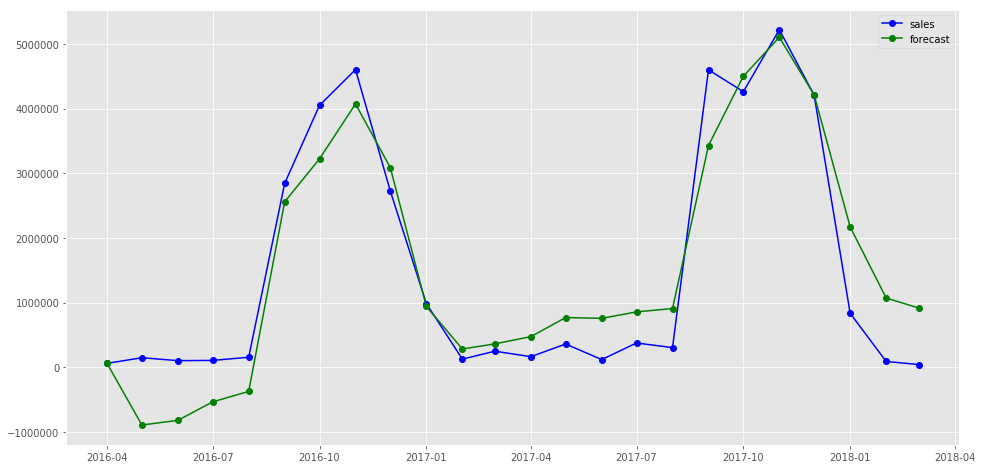

In [23]:
plt.figure(figsize=(16,8))
plt.plot(series["'2000100012001"], c="blue", marker="o", label='sales' )
plt.plot(series['A_triple expo'], "g-o", label='forecast')
plt.legend(loc='best')
plt.style.use("ggplot")
plt.show()

In [28]:
import warnings
from statsmodels.tsa.arima_model import ARIMA
# evaluate an ARIMA model for a given order (p,d,q)
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true , y_pred = np.array(y_true), np.array(y_pred)
    return (((np.sum(np.abs(y_true - y_pred))) / (np.sum(y_pred))) * 100)

def evaluate_arima_model(series, arima_order):
    history = [x for x in series]
    # make predictions
    predictions = []
    for t in range(len(series)):
        model = ARIMA(history, order=arima_order)
        results_AR = model.fit(disp=0)
        y_hat = results_AR.fittedvalues[0]
        predictions.append(y_hat)
        history.append(series[t])
    # calculate out of sample error
    error = mean_absolute_percentage_error(series,predictions)
    return (error,predictions)
    
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = 999999999, float("inf")
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    (mape,predictions) = evaluate_arima_model(dataset, order)
                    if 0<=mape < best_score:
                        best_score, best_cfg = mape, order
                        result=predictions
                    print('ARIMA {} MAPE {}'.format(order,mape))
                except:
                    continue
    absolute_error=(best_score/100)*sum(result)
    forecast_sum=sum(result)                
    print('Best ARIMA {} MAPE {} Absolute Error {} Forecast Sum {}'.format(best_cfg, best_score,absolute_error,forecast_sum))
    return result 

In [29]:
warnings.filterwarnings("ignore")  
ARIMA =  evaluate_models(series["'2000100012001"], [0,1,2], range(0,3), range(0,3))
series['ARIMA'] = ARIMA

ARIMA (0, 0, 0) MAPE 116.15727898290604
ARIMA (0, 0, 1) MAPE 116.15727898292583
ARIMA (0, 1, 0) MAPE 3677.0334451605495
ARIMA (0, 1, 1) MAPE 3677.033445166794
ARIMA (0, 1, 2) MAPE 3677.0334449199763
ARIMA (0, 2, 0) MAPE -97423.25101709689
ARIMA (0, 2, 1) MAPE -105430.13847395235
ARIMA (0, 2, 2) MAPE -46597.914267666194
ARIMA (1, 0, 0) MAPE 116.15727898286454
ARIMA (1, 0, 1) MAPE 116.15727898286727
ARIMA (1, 1, 0) MAPE 3677.033445153522
ARIMA (1, 2, 0) MAPE -97423.25100893107
ARIMA (2, 0, 0) MAPE 116.15727898288839
ARIMA (2, 1, 0) MAPE 3677.033445162695
ARIMA (2, 2, 0) MAPE -97423.251009857
Best ARIMA (1, 0, 0) MAPE 116.15727898286454 Absolute Error 40471971.38916886 Forecast Sum 34842389.3393192


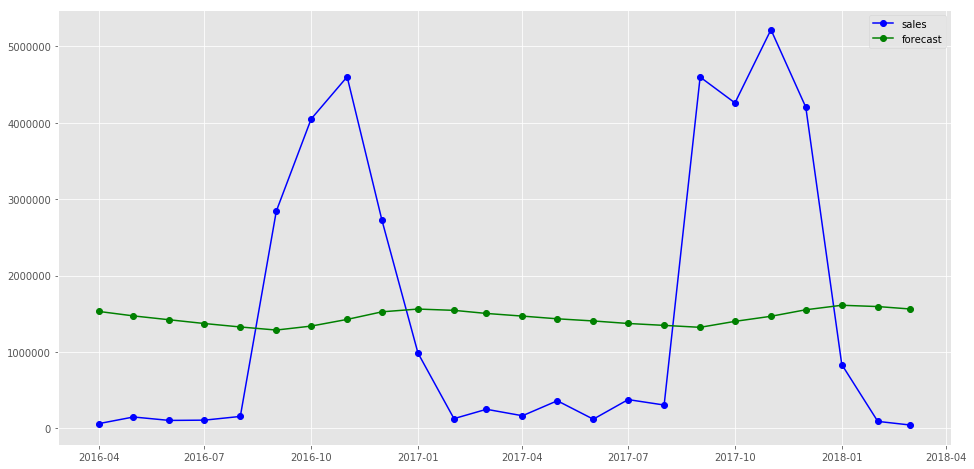

In [30]:
plt.figure(figsize=(16,8))
plt.plot(series["'2000100012001"], c="blue", marker="o", label='sales' )
plt.plot(series['ARIMA'], "g-o", label='forecast')
plt.legend(loc='best')
plt.style.use("ggplot")
plt.show()